# Failure Modes of Variational Autoencoders with the Thermodynamic Variational Objective

Harvard Fall 2020 AM 207 Term Project


**Paper citation**: [Masrani, Le, and Wood. "The Thermodynamic Variational Objective." Advanced in Neural Information Processing Systems. 2019.](https://papers.nips.cc/paper/2019/file/618faa1728eb2ef6e3733645273ab145-Paper.pdf)

**Team member**: Haoxue Fan, Yixing Guan, Minhuan Li, Wenbo Wang (alphabetical order)


### Overview

This Paper 'The Thermodynamic Variational Objective' connects variational inference with thermodynamic integration. It proposes a new tighter lower bound (Thermodynamic Objective, TVO) to log evidence, which generalized the standard ELBO. It has been shown to have superior performance on both discrete and continuous latent variable structures. 

Despite its superior performance, we focus on another aspect of this algorithm: can it bypass the documented failure modes of VAE with ELBO objective? Our experiment results suggest a negative answer. We think this again reveals the ubiquitity of failure modes in VAE, and could remind practitioners to be cautious when applying new objectives in VAE. 

Our report can be devided in three parts. In the first part, we introduced the TVO paper. In th second part, we implemented pedagogical examples to reveal its failure modes. Finally, we summarized the experiment results and made general evaluations.


Table of Contents

1. Problem Statement

2. Existing work

3. Contribution

4. Technical Content

5. Motivation for pedagogical experiments: failure modes of VAE with ELBO objective

6. Implementation Details

7. General Discussion and Future work

8. Broader Impact

9. Reference

### Problem Statement:
For learning of deep generative models, the choosing of proper variational objectives is important. 
This paper aims to propose a novel variational objective that is able to be a tighter the lower bound of the log marginal 
likelihood than the standard evidence lower bound(ELBO). Besides, this paper aims to provide the efficient gradient estimator for the objective that may apply to different cases like continuous, discrete and non-reparameterizable distributions. 

#### Contex/scope

Variational autoencoder(VAE) is one of the most important approach for the approximation of complicated distributions, which has shown promising performance in generative model learning. The general framework of VAE can be describe as below, we have the generative model:

$$
p(z) \sim \mathcal{N}(0, I)
$$

$$
p_{\theta}(x|z) \sim \mathcal{N}(f_{\theta}(z), \sigma_{\epsilon}^2I )
$$

Where $f_{\theta}$ is a neural network parameterized by $\theta$, our goal is to approximate the posterior distribution by maximizing the likelihood function of our observed data:

$$
\underset{\theta}{\mathrm{argmax}} \underset{p(x)}{\mathbb{E}}[\mathrm{log} p_{\theta}(x)]
$$

Since

$$
\begin{aligned}
    & p_{\theta}(x) = \int_{z}p_{\theta}(x, z)dz \\
    & = \int_{z}p_{\theta}(x|z)p(z)dz \\
    & = \underset{p(z)}{\mathbb{E}}[p_{\theta}(x|z)] 
\end{aligned}
$$

The optimizing problem is therefore:
$$
\underset{\theta}{\mathrm{argmax}} \underset{p(x)}{\mathbb{E}}[\mathrm{log} \underset{p(z)}{\mathbb{E}}[p_{\theta}(x|z)] ]
$$

However, since only in few cases has the integral $\int_{z}p_{\theta}(x|z)p(z)dz$ analytical solutions, the marginal likelihood function is usually intractable. A compromise approach is to optimizing the lower bound of  the log marginal likelihood function. By applying the Jensen's inequality, we have:

$$
\begin{aligned}
    & \underset{p(z)}{\mathbb{E}}[p_{\theta}(x|z)]  = \mathrm{log} \underset{q_{\phi}(z|x)}{\mathbb{E}}[\frac{p_{\theta}(x|z)p(z)}{q_{\phi}(z|x)}] \\
    & \geq \underset{q_{\phi}(z|x)}{\mathbb{E}}[\mathrm{log} \frac{p_{\theta}(x|z)p(z)}{q_{\phi}(z|x)}] \\
\end{aligned}
$$

The term $\geq \underset{q_{\phi}(z|x)}{\mathbb{E}}[\mathrm{log} \frac{p_{\theta}(x|z)p(z)}{q_{\phi}(z|x)}]$ is called the evidence lower bound(ELBO) and we now we may maximize the ELBO for an altenative. However, since the ELBO is just a lower bound to the log marginal likelihood function, and optimizing tighter bound is empirically associated with better model learning. 

In brief, VAE aims to find a model best approximate the posterior distribution based on the given training data. Due to the intractability of log marginal likelihood function, 
an alternative objective is to maximize the evidence lower bound(ELBO), which is much easier to comopute.
 However, ELBO is only a lower bound of the log marginal likelihood(i.e. the inference objective) and is not a tight approximation. 
 Thus, it is important to propose the objective that tighenting the variational bounds to obtain a better learning of the models.

### Existing Work

Thermodynamic integration in physics: Ciccotti, Giovanni. "Molecular-dynamics simulation of statistical-mechanical systems: Varenna on Lake Como, Villa Monastero, 23 July-2 August 1985." (1986).

Other objectves:

geometrically interpolating to improve deep generative modeling:
Bornschein, Jorg, et al. "Bidirectional helmholtz machines." International Conference on Machine Learning. 2016.

Annealed importance sampling(AIS): Roger B Grosse, Chris J Maddison, and Ruslan R Salakhutdinov. Annealing between distributions by averaging moments. In Advances in Neural Information Processing Systems, pages 2769–2777, 2013.

Reweighted wake-sleep: Bornschein, Jörg, and Yoshua Bengio. "Reweighted wake-sleep." arXiv preprint arXiv:1406.2751 (2014).

Importance weighted autoencoders: Burda, Yuri, Roger Grosse, and Ruslan Salakhutdinov. "Importance weighted autoencoders." arXiv preprint arXiv:1509.00519 (2015).

Filtering variational objectivesMaddison, Chris J., et al. "Filtering variational objectives." Advances in Neural Information Processing Systems 30 (2017): 6573-6583.

Auto-encoding sequential monte carlo: Le, Tuan Anh, et al. "Auto-encoding sequential monte carlo." arXiv preprint arXiv:1705.10306 (2017).

Monte Carlo objectives: Mnih, Andriy, and Danilo J. Rezende. "Variational inference for monte carlo objectives." arXiv preprint arXiv:1602.06725 (2016).

### Contribution

The authors in this paper introduced a novel variational objective called the thermodynamic variational objective(TVO) by connecting the concept of thermodynamic integration with variational inference. The author showed that the standard ELBO is just a speicial case of the TVO. Besides, the author provided a computationally efficient gradient estimator for the TVO and use TVO to learn both the discrete and continous deep generative models. TVO has extend the ELBO to a more general framework and provided a tighter lower bound for the log marginal likelihood.



### Technical content

The paper defined Thermodynamic Variational Identity as:

$$
\int_{0}^{1} \mathbb{E}_{\pi \beta}[\mathrm{log}\frac{p_{\theta}(\mathbf{x, z})}{q_{\phi}(\mathbf{z|x})}d\beta] = \mathrm{log} p_{\theta}(x)
$$

And the tighter bound of log marginal likelihood TVO is:

$$
\frac{1}{K}[ELBO(\theta, \phi, \mathbf{x}) + \sum_{k=1}^{K-1}\mathbb{E}_{\pi \beta_k}[\mathrm{log}\frac{p_{\theta}(\mathbf{x, z})}{q_{\phi}(\mathbf{z|x})}]] \leq \int_{0}^{1} \mathbb{E}_{\pi \beta}[\mathrm{log}\frac{p_{\theta}(\mathbf{x, z})}{q_{\phi}(\mathbf{z|x})}d\beta] = log p_{\theta}(x)
$$ 

The evidenmce lower bound(ELBO) used in learning variational autoencoders(VAES) is:
$$
ELBO(\theta, \phi, x):= \mathrm{log}p_{\theta}(\mathbf(x))-KL(q_{\phi}(\mathbf{z|x})||p_{\theta}(\mathbf{z|x}))
$$

which can be reagrded as a special case of TVO when $\beta=0$. 

The figure below demonstrates the relationship between TVO and ELBO, and why TVO is a tighter bound compared to ELBO visually. The authors have also mentioned that maximizing the TVO is equivalent to minimizing a divergence between the variational distribution and true posterior, including  KL divergence as a special case.

![img](./TVO_illustration.png)

For optimizing the TVO, the paper proposed and used the covariance gradient estimator defined as below:

$$
\nabla_{\lambda}\mathbb{E}_{\pi\lambda,\beta}[f_{\lambda}(\mathbf{z}] = \mathbb{E}_{\pi\lambda,\beta}[\nabla_{\lambda}f_{\lambda}(\mathbf{z}] + Cov_{\pi_{\lambda}, \beta}[\nabla_{\lambda}log\tilde{\pi}_{\lambda,\beta(z)}, f_{\lambda}(z)]
$$

And used the TVO to learn the parameters of a deep generative model with both discrete and continous models  from the binarized MNIST database.

For the discrete Deep generative model, they used the binarized MNIST dataset with the standard train/validation/test split of 50k/10k/10k and. employ the TVO
as the Adam optimizer on sigmoid belief network. They tested the effect of $S, K and \beta$ locations and made comparsion between TVO and other reported objectives like VIMCO and RWS with the wake-$\phi$ objective

For continuous deep generative models, they used same dataset as the discrete case and made comparision with the single sample VAE objectivew and multisample IWAE objective.

The detailed deep generative models are shown as follow:

#### Discrete latent variables:

$$
p_{\theta}(\mathbf{z}_L) = \mathrm{Bernoulli}(\mathbf{z}_L|\mathbf{b}_{L}), 
$$
$$
p_{\theta}(\mathbf{z}_{l}|\mathbf{z}_{l+1}) = \mathrm{Bernoulli}(\mathbf{z}_l|\mathrm{decoder}_{l}(2\mathbf{z}_{l+1} - 1)), l = L-1, ..., 1, 
$$
$$
\tilde{\pi}
p_{\theta}(\mathbf{x}|\mathbf{z}_L) = \mathrm{Bernoulli}(\mathbf{x}|\mathrm{decoder}_{x}(2\mathbf{z}_{1} - 1)+\tilde{x})
$$

The inference network is: 

$$
q_{\phi}(\mathbf{z}_1 | \mathbf{x}) = \mathrm{Bernoulli}(\mathbf{z_1} | \mathrm{encoder}_{1}(\frac{\mathbf{x}-\mathbf{\tilde{x}} + 1}{2}))
$$

$$
q_{\phi}(\mathbf{z}_{l} | \mathbf{z}_{l-1}) = \mathrm{Bernoulli}(\mathbf{z}_{l} | \mathrm{encoder}_{l}(2\mathbf{z}_{l-1} - 1)), l = 2, ..., L
$$

#### Continuous latent variables
$$
p(\mathbf{z}) = \mathrm{Normal}(\mathbf{z}| 0, I),
$$

$$
p_{\theta}(\mathbf{x|z}) = \mathrm{Bernoulli}(\mathbf{x}|\mathrm{decoder}_{\theta}(\mathbf{z}))
$$

Inference network:

$$
q_{\phi}(\mathbf{z|x}) = \mathrm{Normal}(\mathbf{z}|\mathrm{encoder}_{\phi}(\mathbf{x}))
$$



### Motivation for pedagogical experiments: failure modes of VAE with ELBO objective

On a high level, when introducing a new algorithm into use, we should care about not only its 'best' performance, but also its potential 'worst scenario'. Knowledge of this could help practitioners to decide when to use it and be cautious when interpreting the results. This is an especially critical evaluation for deep generative latent variable models since we have no 'ground truth' latent variable distribution to compare with. When it comes to dataset such as images or text, we could visualize the posterior predictive distribution and compare it directly to the input dataset. However, when it comes to dataset that is hard to visualize (e.g. financial dataset), the above 'gut check' doesn't seem to work well. Given the complexity and the noisiness of the real world dataset, it is important for us to understand the potential failure mode of these deep generative latent variable models first with some toy dataset which we have more control over its data generative process.

Though TVO is a tigher bound to log evidence compared to VAE and has superior performance, it is important for us to be aware of the potential failure modes of TVO e.g. will it suffer from same problems that VAE face? Inspired by [Yacoby, Pan and Doshi-Velez's work](https://arxiv.org/pdf/2007.07124.pdf), we investigate whether TVO compromise learning a good generative model in order to learn a good inference model. 

The reason why ELBO suffers from this pathology can be seen clearly when we write down its form. We consider a VAE which assumes the following generative process:

$$ p(z) = N(0,I), p_\theta (x|z) = N(f_\theta (z), \sigma^2_\epsilon \cdot I) $$

where $x$ in $R^D, z\in R^K$ is a latent variable and $f_\theta$ is a neural network parameterized by $\theta$. The ELBO is:

$$ \mathrm{ELBO}(\theta, \phi) = 
\mathbb{E}_{p(x)}\left[\mathbb{E}_{q_\phi (z|x)}\left[\mathrm{log} \frac{p_\theta (x|z)p(z)}{q_\phi (z|x)}\right]\right] $$

where $p(x)$ is the true data distribution, $p_\theta(x)$ is the leraned data distribution and $q_\phi (z|x)$ is a mean field Gaussian distribution family with mean and variance $\mu_\phi (x), \sigma^2_\phi (x)$, parameterized by neura network with parameters $\phi$. We now rewrite the ELBO expression as a sum of two objectives:

$$ \begin{aligned}
\mathrm{argmin}_{\theta, \phi} -\mathrm{ELBO}(\theta, \phi) 
 &= \mathrm{argmin}_{\theta, \phi} \mathbb{E_{p(x)}}\left[\mathbb{E_{q_\phi (z|x)}}\left[\mathrm{log} \frac{q_\phi (z|x)}{p_\theta (x|z)p(z)}\right]\right] \\ &= \mathrm{argmin}_{\theta, \phi} \mathbb{E_{p(x)}}\left[\mathbb{E_{q_\phi (z|x)}}\left[\mathrm{log} \frac{q_\phi (z|x)}{p_\theta (z|x)p_\theta(x)}\right]\right] \\ &= \mathrm{argmin}_{\theta, \phi} (\underbrace{D_\mathrm{KL}[p(x)||p_\theta(x)]}_{\mathrm{MLEO}} + \underbrace{\mathbb{E_p(x)}[D_\mathrm{KL}[q_\phi(z|x)||p_\theta(z|x)]]}_{\mathrm{PMO}})
\end{aligned} $$

which decomposes ELBO into the 'MLE objective' (MLEO, encouraging the learned data distribution to match the true data distribution) and the 'posterior matching objective' (PMO, encouraging the variational posterior to match the generative model posterior).

The authors have pointed out that when following two conditions are satisfied, the ELBO will overregularize the generative model, learning a suboptimal likelihood function even when learning the 'ground truth' likelihood function is possible:

(1) the true posterior is difficult to approximate by a mean field gaussian distribution for a large portion of x's 

(2) there doesn't exist a likelihood function wit a simpler posterior that approximates $p(x)$ well

Given the expression of $\mathrm{TVO}(\theta, \phi)$, which is the sum of $\mathrm{ELBO}(\theta, \phi)$ and a sum of expectation over $\pi_{\beta_k}$, it is unclear to us now whether TVO will suffer from the problem documented above because now ELBO can't be simply decomposed into MLE objective and posterior matching objective. On the other hand, though the authors have proved that maximizing TVO is equivalent to minimize a divergence between the variational distribution and true posterior, this can't guarantee that TVO won't suffer from the above stated problem since the above problem is related to ELBO, not KL divergence. 

Therefore, we decide to implement the first two experiments in the abovementioned [failure mode paper](https://arxiv.org/pdf/2007.07124.pdf) and empirically test whether TVO could bypass this problem. Furthermore, to examine whether this is indeed a problem related to global maximum, we also implemented Lagged Inference Network, which could mitigate the problem of local optima. The logic is that if TVO with LIN still demonstrate problematic behavior, we are more confident in stating the ubiquitity of the pathology to ELBO objective, which also applies to its generalized version TVO.

### Implementation Details

In [ ]:
import torch
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, multivariate_normal, gaussian_kde
from tqdm import tqdm

from torch import nn
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
device = 'cuda' #if you don't have a cuda-supported GPU, use device='cpu' 
# device = 'cpu'
print(torch.__version__)

1.7.0


#### 1. VAE Base class, with ELBO and TVO loss function

VAE and MLP code is based on the implementation from the lecture notebook.

TVO loss function is based on: https://github.com/vmasrani/tvo/blob/master/continuous_vae/src/losses.py

In [ ]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, dims, non_linearity):
        """
        Args:
            dims: list of ints
            non_linearity: differentiable function

        Returns: nn.Module which represents an MLP with architecture

            x -> Linear(dims[0], dims[1]) -> non_linearity ->
            ...
            Linear(dims[-3], dims[-2]) -> non_linearity ->
            Linear(dims[-2], dims[-1]) -> y
            last layer is linear layer"""

        super(MultilayerPerceptron, self).__init__()
        self.dims = dims
        self.non_linearity = non_linearity
        self.linear_modules = nn.ModuleList()
        for in_dim, out_dim in zip(dims[:-1], dims[1:]):
            self.linear_modules.append(nn.Linear(in_dim, out_dim))

    def forward(self, x):
        """
        Args:
            x: input data into this NN module, Tensor
        
        Returns: Feedforward Output
        """
        temp = x
        for linear_module in self.linear_modules[:-1]:
            temp = self.non_linearity(linear_module(temp))
        return self.linear_modules[-1](temp)
    
def init_mlp(in_dim, out_dim, hidden_dim, num_hid_layers=1, non_linearity=nn.ReLU()):
    """Initializes a MultilayerPerceptron.

    Args:
        in_dim: int, intput dimension
        out_dim: int, output dimension
        hidden_dim: int, hidden layer width
        num_hid_layers: int, hidden layer number
        non_linearity: differentiable function

    Returns: a MultilayerPerceptron with the architecture

        x -> Linear(in_dim, hidden_dim) -> non_linearity ->
        ...
        Linear(hidden_dim, hidden_dim) -> non_linearity ->
        Linear(hidden_dim, out_dim) -> y

        where num_layers = 0 corresponds to

        x -> Linear(in_dim, out_dim) -> y"""
    dims = [in_dim] + [hidden_dim for _ in range(num_hid_layers)] + [out_dim]
    return MultilayerPerceptron(dims, non_linearity)

def lognormexp(values, dim=0):
    """Exponentiates, normalizes and takes log of a tensor.

    Args:
        values: tensor [dim_1, ..., dim_N]
        dim: n

    Returns:
        result: tensor [dim_1, ..., dim_N]
            where result[i_1, ..., i_N] =
                                 exp(values[i_1, ..., i_N])
            log( ------------------------------------------------------------ )
                    sum_{j = 1}^{dim_n} exp(values[i_1, ..., j, ..., i_N])
    """

    log_denominator = torch.logsumexp(values, dim=dim, keepdim=True)
    # log_numerator = values
    return values - log_denominator

def exponentiate_and_normalize(values, dim=0):
    """Exponentiates and normalizes a tensor.

    Args:
        values: tensor [dim_1, ..., dim_N]
        dim: n

    Returns:
        result: tensor [dim_1, ..., dim_N]
            where result[i_1, ..., i_N] =
                            exp(values[i_1, ..., i_N])
            ------------------------------------------------------------
             sum_{j = 1}^{dim_n} exp(values[i_1, ..., j, ..., i_N])
    """

    return torch.exp(lognormexp(values, dim=dim))

def get_thermo_loss_from_log_weight_log_p_log_q(log_weight, log_p, log_q, partition, num_particles=1,
                                                integration='left'):
    """Args:
        log_weight: tensor of shape [batch_size, num_particles]
        log_p: tensor of shape [batch_size, num_particles]
        log_q: tensor of shape [batch_size, num_particles]
        partition: partition of [0, 1];
            tensor of shape [num_partitions + 1] where partition[0] is zero and
            partition[-1] is one;
            see https://en.wikipedia.org/wiki/Partition_of_an_interval
        num_particles: int
        integration: left, right or trapz

    Returns:
        loss: scalar that we call .backward() on and step the optimizer.
        elbo: average elbo over data
    """
    heated_log_weight = log_weight.unsqueeze(-1) * partition
    heated_normalized_weight = exponentiate_and_normalize(
        heated_log_weight, dim=1)
    thermo_logp = partition * log_p.unsqueeze(-1) + \
        (1 - partition) * log_q.unsqueeze(-1)

    wf = heated_normalized_weight * log_weight.unsqueeze(-1)
    w_detached = heated_normalized_weight.detach()
    wf_detached = wf.detach()
    if num_particles == 1:
        correction = 1
    else:
        correction = num_particles / (num_particles - 1)

    cov = correction * torch.sum(
        w_detached * (log_weight.unsqueeze(-1) - torch.sum(wf, dim=1, keepdim=True)).detach() *
        (thermo_logp - torch.sum(thermo_logp * w_detached, dim=1, keepdim=True)),
        dim=1)

    multiplier = torch.zeros_like(partition)
    if integration == 'trapz':
        multiplier[0] = 0.5 * (partition[1] - partition[0])
        multiplier[1:-1] = 0.5 * (partition[2:] - partition[0:-2])
        multiplier[-1] = 0.5 * (partition[-1] - partition[-2])
    elif integration == 'left':
        multiplier[:-1] = partition[1:] - partition[:-1]
    elif integration == 'right':
        multiplier[1:] = partition[1:] - partition[:-1]

    loss = -torch.mean(torch.sum(
        multiplier * (cov + torch.sum(
            w_detached * log_weight.unsqueeze(-1), dim=1)),
        dim=1))

    return loss


class VAE:
    def __init__(self, x_dim, z_dim, x_var, 
                encoder_hid_layer_num, encoder_hid_width,
                decoder_hid_layer_num, decoder_hid_width,
                encoder_nonlinearity = nn.ReLU(),
                decoder_nonlinearity = nn.ReLU(),
                device = 'cpu'):
        """VAE framework constructor
        Args:
            x_dim: Dimension of observations, int
            z_dim: Dimension of latent space, int
            x_var: varaince of generative model
            en/decoder_hid_layer_num: hidden layer number of en/decoder net, int
            en/decoder_hid_width: dim of en/decoder hidden layer, int
            en/decoder_nonlinearity: torch differentiable function"""
        self.x_dim = x_dim
        self.z_dim = z_dim
        self.x_var = x_var

        self.encoder = init_mlp(self.x_dim, self.z_dim*2, 
                                encoder_hid_width, encoder_hid_layer_num,
                                encoder_nonlinearity)
        self.decoder = init_mlp(self.z_dim, self.x_dim,
                                decoder_hid_width, decoder_hid_layer_num,
                                decoder_nonlinearity)
        if device == 'cuda': 
            self.encoder=self.encoder.cuda()
            self.decoder=self.decoder.cuda()
        self.objective_trace = []
        self.llkhd_KL_trace = []
    
    def generate(self, N=300, z_samples=None):
        """On CPU, use the generative model to generate x given zs sampled from the prior
        Returns: Synthetic observation points Pytorch Tensor with shape (N, x_dim)"""
        if z_samples is None: z_samples = torch.normal(0, 1, size=(N,self.z_dim))
        decodercpu = self.decoder.cpu()
        return decodercpu.forward(z_samples)
    
    def infer(self, x):
        """Use the encoder to infer mean and sigma of q(z|x)
        Args:
            x: observation points, torch tensor, shape (N, x_dim)
        Returns: 
            mean: mean of q(z|x), torch tensor, shape (N, z_dim)
            std: std of q(z|x), positive, torch tensor, shape (N, z_dim)"""
        z_params = self.encoder.forward(x)
        mean = z_params[:,:self.z_dim]
        parameterized_std = z_params[:,self.z_dim:]
        std = torch.exp(parameterized_std) # To keep the std positive
        return mean, std

    def llkhd_KL(self, x_train, S, device = 'cpu'):
        '''Output Log Likelihood and KL divergence, fro trace plot'''
        assert len(x_train.shape) == 2
        assert x_train.shape[1] == self.x_dim
        if S is not None:
            self.S = S
        N = x_train.shape[0] #sample numbers
        
        #infer zs with encoder 
        mean, std = self.infer(x_train)
        assert std.shape == (N, self.z_dim)
        assert mean.shape == (N, self.z_dim)
        
        #sample zs with the parameters
        if device == 'cuda': z_samples = torch.normal(0,1,size=(self.S, N, self.z_dim)).cuda() * std + mean
        if device == 'cpu': z_samples = torch.normal(0,1,size=(self.S, N, self.z_dim)) * std + mean
        assert z_samples.shape == (self.S, N, self.z_dim)
        
        #predict xs
        x = self.decoder.forward(z_samples)
        assert x.shape == (self.S, N, self.x_dim)
        
        #evaluate log_likelihood p(y_n)
        norm1 = torch.distributions.Normal(x, self.x_var**0.5)
        log_likelihood = torch.sum(norm1.log_prob(x_train), axis=-1)
        assert log_likelihood.shape == (self.S, N)
        
        #evaluate sampled zs under prior 
        norm2 = torch.distributions.Normal(0.0, 1.0)
        log_pz = torch.sum(norm2.log_prob(z_samples), axis=-1)
        assert log_pz.shape == (self.S, N)
        
        #evaluate sampled z's under variational distribution
        norm3 = torch.distributions.Normal(mean, std)
        log_qz_given_x = torch.sum(norm3.log_prob(z_samples), axis=-1)

        return [torch.mean(log_likelihood).item(), torch.mean(log_qz_given_x - log_pz).item()]

    
    def make_elbo_objective(self, x_train, S, device = 'cpu'):
        '''Make ELBO objective function'''
        assert len(x_train.shape) == 2
        assert x_train.shape[1] == self.x_dim
        if S is not None:
            self.S = S
        N = x_train.shape[0] #sample numbers
        
        #infer zs with encoder 
        mean, std = self.infer(x_train)
        assert std.shape == (N, self.z_dim)
        assert mean.shape == (N, self.z_dim)
        
        #sample zs with the parameters
        if device == 'cuda': z_samples = torch.normal(0,1,size=(self.S, N, self.z_dim)).cuda() * std + mean
        if device == 'cpu': z_samples = torch.normal(0,1,size=(self.S, N, self.z_dim)) * std + mean
        assert z_samples.shape == (self.S, N, self.z_dim)
        
        #predict xs
        x = self.decoder.forward(z_samples)
        assert x.shape == (self.S, N, self.x_dim)
        
        #evaluate log_likelihood p(y_n)
        norm1 = torch.distributions.Normal(x, self.x_var**0.5)
        log_likelihood = torch.sum(norm1.log_prob(x_train), axis=-1)
        assert log_likelihood.shape == (self.S, N)
        
        #evaluate sampled zs under prior 
        norm2 = torch.distributions.Normal(0.0, 1.0)
        log_pz = torch.sum(norm2.log_prob(z_samples), axis=-1)
        assert log_pz.shape == (self.S, N)
        
        #evaluate sampled z's under variational distribution
        norm3 = torch.distributions.Normal(mean, std)
        log_qz_given_x = torch.sum(norm3.log_prob(z_samples), axis=-1)
        
        elbo = torch.mean(log_likelihood - log_qz_given_x + log_pz)
        
        return -elbo
    
    def make_tvo_objective(self, x_train, S, partition, num_particles=10, integration='left', device='cpu'):
        '''Make TVO objective function'''
        assert len(x_train.shape) == 2
        assert x_train.shape[1] == self.x_dim
        if S is not None:
            self.S = S
        N = x_train.shape[0] #sample numbers
        
        #infer zs with encoder 
        mean, std = self.infer(x_train)
        assert std.shape == (N, self.z_dim)
        assert mean.shape == (N, self.z_dim)
        
        #sample zs with the parameters
        if device == 'cuda': z_samples = torch.normal(0,1,size=(self.S, N, self.z_dim)).cuda() * std + mean
        if device == 'cpu': z_samples = torch.normal(0,1,size=(self.S, N, self.z_dim)) * std + mean
        assert z_samples.shape == (self.S, N, self.z_dim)
        
        #predict xs
        x = self.decoder.forward(z_samples)
        assert x.shape == (self.S, N, self.x_dim)
        
        #evaluate log_likelihood log p_w(y_n)
        norm1 = torch.distributions.Normal(x, self.x_var**0.5)
        log_likelihood = torch.sum(norm1.log_prob(x_train), axis=-1)
        assert log_likelihood.shape == (self.S, N)
        
        #evaluate sampled zs under prior log q_v(z_n)
        norm2 = torch.distributions.Normal(0.0, 1.0)
        log_pz = torch.sum(norm2.log_prob(z_samples), axis=-1)
        assert log_pz.shape == (self.S, N)
        
        #evaluate sampled z's under variational distribution, p_w( zn | yn )
        norm3 = torch.distributions.Normal(mean, std)
        log_qz_given_x = torch.sum(norm3.log_prob(z_samples), axis=-1)
        
        log_weight = log_likelihood - log_qz_given_x + log_pz
        log_p = log_likelihood
        log_q = log_qz_given_x - log_pz
        
        return get_thermo_loss_from_log_weight_log_p_log_q(log_weight, 
                                                           log_p, 
                                                           log_q, 
                                                           partition, 
                                                           num_particles,
                                                           integration)

#### 2. Helper functions for training VAE, with and without LIN Trick

Notebook containing unit tests for VAE training without LIN trick:

https://github.com/minhuanli/am207-tvo-project/blob/master/notebooks/VAE_Unit_Tests.ipynb

Notebook containing unit tests for VAE training with LIN trick:

https://github.com/minhuanli/am207-tvo-project/blob/master/notebooks/VAE_unit_tests_with_LIN_trick.ipynb


In [ ]:
Lidef calc_mi(vae, x_validation, device='cpu', S=1):
    '''Approximate the mutual information between x and z
    I(x, z) = E_xE_{q(z|x)}log(q(z|x)) - E_xE_{q(z|x)}log(q(z))
    Modified from the implementation by Author of the paper "LAGGING INFERENCE NETWORKS 
    AND POSTERIOR COLLAPSE IN VARIATIONAL AUTOENCODERS"
    see https://github.com/jxhe/vae-lagging-encoder/blob/master/modules/encoders/encoder.py
    
    This function will calculate the mutual information during the training with LIN trick,
    as a criterion wehther we should stop the agressive training. 
    
    Parameters:
    -----------
    vae: A vae instance, with .infer() method
    
    x_validation: Validation X data set
    
    Returns: Float
    '''
    N_batch = x_validation.shape[0]
    
    #infer zs with encoder 
    # 2D Tensor, shape [N_batch, z_dim]
    mean, std = vae.infer(x_validation)
    assert std.shape == (N_batch, vae.z_dim)
    assert mean.shape == (N_batch, vae.z_dim)
    
    ## Term 1: calculate Negative Entropy, E_{q(z|x)}log(q(z|x))
    # E_{q(z|x)}log(q(z|x)) = -0.5* z_dim *log(2*\pi) - 0.5*(1+log(std**2)).sum(-1)
    # 1D Tensor, shape [N_batch]
    neg_entropy = (-0.5 * vae.z_dim * math.log(2. * math.pi)- 0.5 * (1 + torch.log(std**2)).sum(-1))
    
    
    ## Term 2: calculate E_{q(z|x)}log(q(z))
    #sample zs with the parameters
    if device == 'cuda': z_samples = torch.normal(0,1,size=(S, N_batch, vae.z_dim)).cuda() * std + mean
    if device == 'cpu': z_samples = torch.normal(0,1,size=(S, N_batch, vae.z_dim)) * std + mean
    assert z_samples.shape == (S, N_batch, vae.z_dim)
    
    #evaluate sampled z's under variational distribution
    # 2D Tensor, shape [S, N_batch]
    norm1 = torch.distributions.Normal(mean, std)
    log_qz= torch.sum(norm1.log_prob(z_samples), axis=-1)
    
    return (torch.mean(neg_entropy) - torch.mean(log_qz)).item()

def train_ELBO_VAE_batched(x_train, 
                   x_var = 0.01,
                   z_dim = 1,
                   width = 50,
                   hidden_layers = 1, 
                   learning_rate = 0.01,
                   S = 10,
                   n_epochs = 5000, 
                   report_iter = 50, 
                   batch_size = 256,
                   device = 'cpu'):
    x_dim = x_train.shape[1]
    if device == 'cuda': x_trainT = torch.tensor(x_train).float().cuda()
    if device == 'cpu': x_trainT = torch.tensor(x_train).float()
    batch_num = int(x_train.shape[0]/batch_size)
    vae_instance = VAE(x_dim, z_dim, x_var, hidden_layers, width, hidden_layers, width, device=device)
    parameters = list(vae_instance.encoder.parameters())+list(vae_instance.decoder.parameters())
    optimizer = torch.optim.Adam(parameters, lr=learning_rate)
    counter=0
    for epoch in tqdm(range(n_epochs)):
        x_trainT=x_trainT[torch.randperm(x_trainT.size()[0])]
        for i in range(batch_num):
            x_batch = x_trainT[i*batch_size:(i+1)*batch_size,:]
            optimizer.zero_grad()
            loss = vae_instance.make_elbo_objective(x_trainT, S, device=device)
            loss.backward()
            optimizer.step()
            counter=counter+1
            if counter % report_iter == 0:
                vae_instance.objective_trace.append(loss.item())
                vae_instance.llkhd_KL_trace.append(vae_instance.llkhd_KL(x_batch, S, device=device))
    return vae_instance

def train_ELBO_LIN_VAE_batched(x_train,
                   x_val,
                   x_var = 0.01,
                   z_dim = 1,
                   width = 50,
                   hidden_layers = 1, 
                   learning_rate = 0.01,
                   S = 10,
                   n_epochs = 5000, 
                   report_iter = 50, 
                   batch_size = 256,
                   device = 'cpu'):
    x_dim = x_train.shape[1]
    if device == 'cuda': 
        x_trainT = torch.tensor(x_train).float().cuda()
        x_valT = torch.tensor(x_val).float().cuda()
    if device == 'cpu': 
        x_trainT = torch.tensor(x_train).float()
        x_valT = torch.tensor(x_val).float()
    batch_num = int(x_train.shape[0]/batch_size)
    vae_instance = VAE(x_dim, z_dim, x_var, hidden_layers, width, hidden_layers, width, device=device)
    enc_optimizer = torch.optim.Adam(vae_instance.encoder.parameters(), lr=learning_rate)
    dec_optimizer = torch.optim.Adam(vae_instance.decoder.parameters(), lr=learning_rate)
    counter = 0
    pre_mi = 0
    best_mi = 0
    mi_not_improved = 0
    aggressive_flag = True
    for epoch in tqdm(range(n_epochs)):
        x_trainT=x_trainT[torch.randperm(x_trainT.size()[0])]
        for i in range(batch_num):
            x_batch = x_trainT[i*batch_size:(i+1)*batch_size,:]
            sub_iter=0
            while aggressive_flag and sub_iter < 100:
                enc_optimizer.zero_grad()
                dec_optimizer.zero_grad()
                loss = vae_instance.make_elbo_objective(x_batch, S, device=device)
                loss.backward()
                enc_optimizer.step()
                sub_iter += 1
                
            enc_optimizer.zero_grad()
            dec_optimizer.zero_grad()
            loss = vae_instance.make_elbo_objective(x_batch, S, device=device)
            loss.backward()
            if not aggressive_flag:
                enc_optimizer.step()
            dec_optimizer.step()
            counter=counter+1
            if counter % report_iter == 0:
                vae_instance.objective_trace.append(loss.item())
                vae_instance.llkhd_KL_trace.append(vae_instance.llkhd_KL(x_batch, S, device=device))
            if aggressive_flag and counter % batch_num == 0:
                cur_mi = calc_mi(vae_instance, x_valT, device=device)
                if cur_mi - best_mi < 0:
                    mi_not_improved += 1
                    if mi_not_improved == 5:
                        print("At iteration {} aggresive_flag is set to False".format(counter))
                        aggressive_flag = False
                else:
                    best_mi = cur_mi
                pre_mi = cur_mi

    return vae_instance

def train_TVO_VAE_batched(x_train, 
                  x_var = 0.01,
                  z_dim = 1,
                  width = 50,
                  hidden_layers = 1, 
                  learning_rate = 0.01, 
                  partition = torch.tensor([0,0.25,0.5,0.75,1.]),
                  S = 10,
                  n_epochs = 5000, 
                  report_iter = 50, 
                  batch_size = 256,
                  device = 'cpu'):
    x_dim = x_train.shape[1]
    if device == 'cuda': 
        x_trainT = torch.tensor(x_train).float().cuda()
        partition = partition.cuda()
    if device == 'cpu': x_trainT = torch.tensor(x_train).float()
    batch_num = int(x_train.shape[0]/batch_size)
    vae_instance = VAE(x_dim, z_dim, x_var, hidden_layers, width, hidden_layers, width, device=device)
    parameters = list(vae_instance.encoder.parameters())+list(vae_instance.decoder.parameters())
    optimizer = torch.optim.Adam(parameters, lr=learning_rate)
    counter=0
    for epoch in tqdm(range(n_epochs)):
        x_trainT=x_trainT[torch.randperm(x_trainT.size()[0])]
        for i in range(batch_num):
            x_batch = x_trainT[i*batch_size:(i+1)*batch_size,:]
            optimizer.zero_grad()
            loss = vae_instance.make_tvo_objective(x_batch, S, partition, device=device)
            loss.backward()
            optimizer.step()
            counter=counter+1
            if counter % report_iter == 0:
                vae_instance.objective_trace.append(loss.item())
                vae_instance.llkhd_KL_trace.append(vae_instance.llkhd_KL(x_batch, S, device=device))
    return vae_instance

def train_TVO_LIN_VAE_batched(x_train,
                   x_val,
                   x_var = 0.01,
                   z_dim = 1,
                   width = 50,
                   hidden_layers = 1, 
                   learning_rate = 0.01,
                   partition = torch.tensor([0,0.25,0.5,0.75,1.]),
                   S = 10,
                   n_epochs = 5000, 
                   report_iter = 50, 
                   batch_size = 256,
                   device = 'cpu'):
    x_dim = x_train.shape[1]
    if device == 'cuda': 
        x_trainT = torch.tensor(x_train).float().cuda()
        x_valT = torch.tensor(x_val).float().cuda()
        partition = partition.cuda()
    if device == 'cpu': 
        x_trainT = torch.tensor(x_train).float()
        x_valT = torch.tensor(x_val).float()
    batch_num = int(x_train.shape[0]/batch_size)
    vae_instance = VAE(x_dim, z_dim, x_var, hidden_layers, width, hidden_layers, width, device=device)
    enc_optimizer = torch.optim.Adam(vae_instance.encoder.parameters(), lr=learning_rate)
    dec_optimizer = torch.optim.Adam(vae_instance.decoder.parameters(), lr=learning_rate)
    counter = 0
    pre_mi = 0
    best_mi = 0
    mi_not_improved = 0
    aggressive_flag = True
    for epoch in tqdm(range(n_epochs)):
        x_trainT=x_trainT[torch.randperm(x_trainT.size()[0])]
        for i in range(batch_num):
            x_batch = x_trainT[i*batch_size:(i+1)*batch_size,:]
            sub_iter=0
            while aggressive_flag and sub_iter < 100:
                enc_optimizer.zero_grad()
                dec_optimizer.zero_grad()
                loss = vae_instance.make_tvo_objective(x_batch, S, partition, device=device)
                loss.backward()
                enc_optimizer.step()
                sub_iter += 1
                
            enc_optimizer.zero_grad()
            dec_optimizer.zero_grad()
            loss = vae_instance.make_tvo_objective(x_batch, S, partition, device=device)
            loss.backward()
            if not aggressive_flag:
                enc_optimizer.step()
            dec_optimizer.step()
            counter=counter+1
            if counter % report_iter == 0:
                vae_instance.objective_trace.append(loss.item())
                vae_instance.llkhd_KL_trace.append(vae_instance.llkhd_KL(x_batch, S, device=device))
            if aggressive_flag and counter % batch_num == 0:
                cur_mi = calc_mi(vae_instance, x_valT, device=device)
                if cur_mi - best_mi < 0:
                    mi_not_improved += 1
                    if mi_not_improved == 5:
                        print("At iteration {} aggresive_flag is set to False".format(counter))
                        aggressive_flag = False
                else:
                    best_mi = cur_mi
                pre_mi = cur_mi

    return vae_instance

def random_start_ELBO_VAE(x_train, 
                  x_var = 0.01,
                  z_dim = 1,
                  width = 50,
                  hidden_layers = 1, 
                  learning_rate = 0.01,
                  S = 10,
                  n_epochs = 5000, 
                  report_iter = 50, 
                  batch_size = 256,
                  restart = 5):
    best_vae = train_ELBO_VAE_batched(x_train, 
                  x_var = x_var,
                  z_dim = z_dim,
                  width = width,
                  hidden_layers = hidden_layers, 
                  learning_rate = learning_rate,
                  S = S,
                  n_epochs = n_epochs, 
                  report_iter = report_iter, 
                  batch_size = batch_size)
    loss_min = best_vae.objective_trace[-1]
    for i in range(1, restart):
        cur_vae = train_ELBO_VAE_batched(x_train, 
                  x_var = x_var,
                  z_dim = z_dim,
                  width = width,
                  hidden_layers = hidden_layers, 
                  learning_rate = learning_rate, 
                  S = S,
                  n_epochs = n_epochs, 
                  report_iter = report_iter, 
                  batch_size = batch_size)
        cur_loss = cur_vae.objective_trace[-1]
        if cur_loss < loss_min:
            loss_min = cur_loss
            best_vae = cur_vae
    return best_vae

def random_start_TVO_VAE(x_train, 
                  x_var = 0.01,
                  z_dim = 1,
                  width = 50,
                  hidden_layers = 1, 
                  learning_rate = 0.01, 
                  partition = torch.tensor([0,0.25,0.5,0.75,1.]),
                  S = 10,
                  n_epochs = 5000, 
                  report_iter = 50, 
                  batch_size = 256,
                  restart = 5):
    best_vae = train_TVO_VAE_batched(x_train, 
                  x_var = x_var,
                  z_dim = z_dim,
                  width = width,
                  hidden_layers = hidden_layers, 
                  learning_rate = learning_rate, 
                  partition = partition,
                  S = S,
                  n_epochs = n_epochs, 
                  report_iter = report_iter, 
                  batch_size = batch_size)
    loss_min = best_vae.objective_trace[-1]
    for i in range(1, restart):
        cur_vae = train_TVO_VAE_batched(x_train, 
                  x_var = x_var,
                  z_dim = z_dim,
                  width = width,
                  hidden_layers = hidden_layers, 
                  learning_rate = learning_rate, 
                  partition = partition,
                  S = S,
                  n_epochs = n_epochs, 
                  report_iter = report_iter, 
                  batch_size = batch_size)
        cur_loss = cur_vae.objective_trace[-1]
        if cur_loss < loss_min:
            loss_min = cur_loss
            best_vae = cur_vae
    return best_vae


#### 3. Helper functions for visualization

In [ ]:
def visualize_VAE(vae_instance,
                  x_train, 
                  mode,
                  x_var=0.01,
                  number_samples=300,
                  figsize=(10,10)):
    x_hat = vae_instance.generate(number_samples).detach().cpu()
    x_hat = x_hat + np.random.normal(0, x_var**0.5, size=x_hat.shape)
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.scatter(x_train[:,0], x_train[:,1], color='black',s=20, label="Training Data")
    ax.scatter(x_hat[:, 0], x_hat[:,1], color='blue', s=20, alpha=0.5, label="Generative Data")
    ax.set_title('VAE Generative data with {}'.format(mode), fontsize=20)
    plt.show()

def visualize_pdf(data, lim=1, c_map="magma_r"):
    kde = gaussian_kde(data.T)

    # evaluate on a regular grid
    xgrid = np.linspace(-lim, lim, 60)
    ygrid = np.linspace(-lim, lim, 60)
    Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
    Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

    plt.figure(figsize=(5,4))
    plt.imshow(Z.reshape(Xgrid.shape),
               origin='lower', aspect='auto',
               extent=[-lim, lim, -lim, lim],
               cmap=c_map)
    plt.xlabel('x1')
    plt.ylabel('x2')
    cb = plt.colorbar()
    cb.set_label("density")

def compare_VAE(elbo_vae, tvo_vae, x_train, number_samples=2000, x_var=0.02, lim=2, c_map="magma_r"):

    kde = gaussian_kde(x_train.T)
    
    x_hat_elbo = elbo_vae.generate(number_samples).detach().cpu()
    x_hat_elbo = x_hat_elbo + np.random.normal(0, x_var**0.5, size=x_hat_elbo.shape)
    kde_elbo = gaussian_kde(x_hat_elbo.T)
    
    x_hat_tvo = tvo_vae.generate(number_samples).detach().cpu()
    x_hat_tvo = x_hat_tvo + np.random.normal(0, x_var**0.5, size=x_hat_tvo.shape)
    kde_tvo = gaussian_kde(x_hat_tvo.T)
    
    # evaluate on a regular grid
    xgrid = np.linspace(-lim, lim, 60)
    ygrid = np.linspace(-lim, lim, 60)
    Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
    Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
    Z_elbo = kde_elbo(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
    Z_tvo = kde_tvo(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    im=ax[0].imshow(Z.reshape(Xgrid.shape),
               origin='lower', aspect='auto',
               extent=[-lim, lim, -lim, lim],
               cmap=c_map)
    ax[0].set_xlabel('x1')
    ax[0].set_ylabel('x2')
    ax[0].set_title('data')
    fig.colorbar(im, ax=ax[0])
    
    im=ax[1].imshow(Z_elbo.reshape(Xgrid.shape),
               origin='lower', aspect='auto',
               extent=[-lim, lim, -lim, lim],
               cmap=c_map)
    ax[1].set_xlabel('x1')
    ax[1].set_ylabel('x2')
    ax[1].set_title('elbo')
    fig.colorbar(im, ax=ax[1])
    
    im=ax[2].imshow(Z_tvo.reshape(Xgrid.shape),
               origin='lower', aspect='auto',
               extent=[-lim, lim, -lim, lim],
               cmap=c_map)
    ax[2].set_xlabel('x1')
    ax[2].set_ylabel('x2')
    ax[2].set_title('tvo')
    fig.colorbar(im, ax=ax[2])
    plt.show()


def compare_VAE_true_function(elbo_vae, tvo_vae, z_dim, number_samples, z_samples, z_samples_np, task='crosscurve'):
    z_samples=z_samples.reshape(-1,z_dim)
    x_elbo=elbo_vae.generate(z_samples=z_samples).detach().cpu()
    x_tvo=tvo_vae.generate(z_samples=z_samples).detach().cpu()
    if task == 'crosscurve': x_true=synthesize_crosscurve(number_samples, z_list=z_samples_np, noise_var=0)
    if task == 'threeclusters': x_true=synthesize_threeclusters(number_samples, z_list=z_samples_np, noise_var=0)
    fig=plt.figure()
    ax=fig.gca(projection='3d')
    ax.plot(x_true[:,0].flatten(), x_true[:,1].flatten(), z_samples_np.flatten(), color = 'black', label='true f_theta(z)')
    ax.plot(x_elbo[:,0].flatten(), x_elbo[:,1].flatten(), z_samples.flatten(), color = 'blue', label='learned f_theta(z)-elbo')
    ax.plot(x_tvo[:,0].flatten(), x_tvo[:,1].flatten(), z_samples.flatten(), color = 'red', label='learned f_theta(z)-tvo')
    ax.legend()
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('z')
    plt.show()

def compare_VAE_line(elbo_vae, tvo_vae, z_dim, number_samples, 
                     z_samples, z_samples_np, x_train, x_var=0.02, lim=2, c_map1="magma_r", c_map2="cool",
                     task="crosscurve"):
    # data for curve
    z_samples=z_samples.reshape(-1,z_dim)
    x_elbo=elbo_vae.generate(z_samples=z_samples).detach().cpu()
    x_tvo=tvo_vae.generate(z_samples=z_samples).detach().cpu()    
    if task == 'crosscurve': x_true=synthesize_crosscurve(number_samples, z_list=z_samples_np, noise_var=0)
    if task == 'threeclusters': x_true=synthesize_threeclusters(number_samples, z_list=z_samples_np, noise_var=0)

    kde = gaussian_kde(x_train.T)
    
    x_hat_elbo = x_elbo + np.random.normal(0, x_var**0.5, size=x_elbo.shape)
    kde_elbo = gaussian_kde(x_hat_elbo.T)
    
    x_hat_tvo = x_tvo + np.random.normal(0, x_var**0.5, size=x_tvo.shape)
    kde_tvo = gaussian_kde(x_hat_tvo.T)
    
    # evaluate on a regular grid
    xgrid = np.linspace(-lim, lim, 60)
    ygrid = np.linspace(-lim, lim, 60)
    Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
    Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
    Z_elbo = kde_elbo(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
    Z_tvo = kde_tvo(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    im=ax[0].imshow(Z.reshape(Xgrid.shape),
               origin='lower', aspect='auto',
               extent=[-lim, lim, -lim, lim],
               cmap=c_map1)
    scatter0 = ax[0].scatter(x_true[:,0], x_true[:,1], s=2, c=z_samples_np.flatten(),cmap=c_map2)
    ax[0].set_xlabel('x1')
    ax[0].set_ylabel('x2')
    ax[0].set_title('data')

    im=ax[1].imshow(Z_elbo.reshape(Xgrid.shape),
               origin='lower', aspect='auto',
               extent=[-lim, lim, -lim, lim],
               cmap=c_map1)
    scatter1 = ax[1].scatter(x_elbo[:,0], x_elbo[:,1], s=2, c=z_samples.numpy().flatten(),cmap=c_map2)
    ax[1].set_xlabel('x1')
    ax[1].set_ylabel('x2')
    ax[1].set_title('elbo')
    
    im=ax[2].imshow(Z_tvo.reshape(Xgrid.shape),
               origin='lower', aspect='auto',
               extent=[-lim, lim, -lim, lim],
               cmap=c_map1)
    scatter2 = ax[2].scatter(x_tvo[:,0], x_tvo[:,1], s=2, c=z_samples.numpy().flatten(),cmap=c_map2)
    ax[2].set_xlabel('x1')
    ax[2].set_ylabel('x2')
    ax[2].set_title('tvo')

    # add axes for colorbar
    cbaxes_im = fig.add_axes([0.2, -0.1, 0.3, 0.3]) 
    cbaxes_scatter = fig.add_axes([0.55, -0.1, 0.3, 0.3]) 

    c_im = plt.colorbar(im, ax=cbaxes_im, orientation="horizontal")
    c_scatter = plt.colorbar(scatter2, orientation="horizontal")
    c_im.set_label('p(x)')
    c_scatter.set_label('z')
    
    # erase axes
    cbaxes_im.set_axis_off()
    cbaxes_scatter.set_axis_off()

    plt.show()

def aggregated_posterior(elbo_vae, tvo_vae, x_train, number_sample_per, device='cpu'):
    
    if device=="cpu":
        x_train_torch = torch.from_numpy(x_train).float()
    
    if device=="cuda":
        x_train_torch = torch.from_numpy(x_train).float().cuda()
        
    mean_z_elbo, std_z_elbo = elbo_vae.infer(x_train_torch)
    mean_z_tvo, std_z_tvo = tvo_vae.infer(x_train_torch)

    mean_z_elbo = mean_z_elbo.detach().cpu().numpy()
    std_z_elbo = std_z_elbo.detach().cpu().numpy()

    mean_z_tvo = mean_z_tvo.detach().cpu().numpy()
    std_z_tvo = std_z_tvo.detach().cpu().numpy()

    z_sample_elbo = []
    z_sample_tvo = []

    for i in range(x_train.shape[0]):
        z_sample_tvo.append(np.random.normal(mean_z_tvo[i], np.exp(std_z_tvo[i]), number_sample_per))
        z_sample_elbo.append(np.random.normal(mean_z_elbo[i], np.exp(std_z_elbo[i]), number_sample_per))
    normal_ground_truth = np.random.normal(0,1,number_sample_per * x_train.shape[0])

    kde_elbo = gaussian_kde(np.array(z_sample_elbo).flatten())
    kde_tvo = gaussian_kde(np.array(z_sample_tvo).flatten())
    kde_normal = gaussian_kde(np.random.normal(0,1, 2000*50))
    
    xs = np.linspace(-5,5,1000)
    
    plt.plot(xs,kde_normal(xs), color="red", label="p(z)")    
    plt.plot(xs,kde_elbo(xs), color="blue", label="q_\phi(z)-ELBO")
    plt.plot(xs,kde_tvo(xs), color="black", label="q_\phi(z)-TVO")
    
    plt.legend()
    plt.xlabel('z')
    
    plt.show()

def true_posterior(x_value, x_var, f_true, z_list=np.linspace(-3,3,500)):
    '''
    This function outputs Posterior p(z|x) under True f_{theta}(z) 
    evaluated at the z_list points

    Parameters
    ----------
    x_value: numpy array or list, shape [2,]
        The x point which conditioned on. For example, x_val=[0.2,0.2]

    x_var: float
        variance of the gaussian distribution in x space

    f_true: function, should have one argument, output a shape (2,) array/list
        The true funtion that transfer z to x_mean = f(z)

    z_list: a list of z points you want to evaluate the posterior

    Returns
    -------
    p(z|x), a list of values, same length as z_list

    '''
    posterior_list=[]
    assert np.array(x_value).shape == (2,)

    for z in z_list:
        x_mean = f_true(z)
        p_x_z = multivariate_normal.pdf(x_value, mean=x_mean, cov=x_var)
        p_z = norm.pdf(z, loc=0., scale=1.)
        p_z_x_unnormalized = p_x_z * p_z 

        posterior_list.append(p_z_x_unnormalized)

    posterior_list = np.array(posterior_list)

    # You can use an MC estimates instead for the normalizer, i am lazy here
    bin_size = (z_list[-1] - z_list[0])/len(z_list)
    normalizer = np.sum(posterior_list)*bin_size

    return posterior_list/normalizer

def trained_posterior(x_value, x_var, vae_instance, z_list=np.linspace(-3,3,500)):
    '''
    This function outputs Posterior p(z|x) under True f_{theta}(z) 
    evaluated at the z_list points
    Parameters
    ----------
    x_value: numpy array or list, shape [2,]
        The x point which conditioned on. For example, x_val=[0.2,0.2]
    x_var: float
        variance of the gaussian distribution in x space
    f_true: function, should have one argument, output a shape (2,) array/list
        The true funtion that transfer z to x_mean = f(z)
    z_list: a list of z points you want to evaluate the posterior
    Returns
    -------
    p(z|x), a list of values, same length as z_list
    '''
    posterior_list=[]
    assert np.array(x_value).shape == (2,)
    x_mean_list = vae_instance.decoder.cpu().forward(torch.tensor(z_list.reshape(-1,1)).float()).detach().numpy()
    for x_mean, z in zip(x_mean_list, z_list):
        p_x_z = multivariate_normal.pdf(x_value, mean=x_mean, cov=x_var)
        p_z = norm.pdf(z, loc=0., scale=1.)
        p_z_x_unnormalized = p_x_z * p_z 

        posterior_list.append(p_z_x_unnormalized)

    posterior_list = np.array(posterior_list)

    # You can use an MC estimates instead for the normalizer, i am lazy here
    bin_size = (z_list[-1] - z_list[0])/len(z_list)
    normalizer = np.sum(posterior_list)*bin_size

    return posterior_list/normalizer


#### 4. Helper functions to generate synthetic data

In [ ]:
def synthesize_crosscurve(sample_nums=2000, z_list=None, noise_var=0.02):
    u = lambda z: np.pi*(0.6+1.8*norm.cdf(z))
    f1 = lambda u: (1./np.sqrt(2))*(np.cos(u)/((np.sin(u))**2 + 1.))
    f2 = lambda u: (np.sqrt(2)) * (np.cos(u) * np.sin(u))/((np.sin(u))**2 + 1.)

    if z_list is None: z_list = np.random.normal(0,1,sample_nums)
    assert len(z_list) == sample_nums, "number of z_list should equal to sample_nums"

    u_list = u(z_list)
    f1_list = f1(u_list) + np.random.normal(0, np.sqrt(noise_var), sample_nums)
    f2_list = f2(u_list) + np.random.normal(0, np.sqrt(noise_var), sample_nums)
    return np.vstack([f1_list, f2_list]).T


def synthesize_threeclusters(sample_nums=2000, z_list=None, noise_var=0.2):
    u = lambda z: (2*np.pi)/(1.+np.exp(-0.5*np.pi*z))
    t = lambda u: 2*np.tanh(10*u - 20*np.floor(u/2.) -10.) + 4.*np.floor(u/2.) + 2
    f1 = lambda t: np.cos(t)
    f2 = lambda t: np.sin(t)

    if z_list is None: z_list = np.random.normal(0,1,sample_nums)
    assert len(z_list) == sample_nums, "number of z_list should equal to sample_nums"

    u_list = u(z_list)
    t_list = t(u_list)
    f1_list = f1(t_list) + np.random.normal(0, np.sqrt(noise_var), sample_nums)
    f2_list = f2(t_list) + np.random.normal(0, np.sqrt(noise_var), sample_nums)
    return np.vstack([f1_list, f2_list]).T

### Pedagogical experiment1: Figure-8 Example

Since the pathologies revealed by two pedagogical experiments are similar, we provide detailed descriptions and discussions of the results from the first example to avoid redundancy. 


**Generative Process**:

$$

\begin{aligned}z & \sim \mathcal{N}(0,1) \\\epsilon & \sim \mathcal{N}\left(0, \sigma_{\epsilon}^{2} \cdot I\right) \\u(z) &=(0.6+1.8 \cdot \Phi(z)) \pi \\ 
x \mid z&=\underbrace{\left[\begin{array}{c}
\frac{\sqrt{2}}{2} \cdot \frac{\cos (u(z))}{\sin (u(z))^{2}+1} \\
\sqrt{2} \cdot \frac{\cos (u(z)) \sin (u(z))}{\sin (u(z))^{2}+1}
\end{array}\right]}_{f_{\theta_{\mathrm{GT}}}(z)}+\epsilon\end{aligned}

$$

here $\Phi(z)$ is the Gaussian $\mathrm{CDF}$ and $\sigma_{\epsilon}^{2}=0.02$

This example possesses a complicated multimodal posterior structure in the neighborhood of x = 0. Besides, in the neighbourhood of x $\approx$ 0 p(x) is high, the above two properties satisfy conditon(1). On the other hand, the current data generative lead any continuous parameterization to a $f_\theta$ with far-away value of $z$ mapping to close values of $x$, resulting in high Posterior matching value for points near $x = 0$, satisfying condition(2).


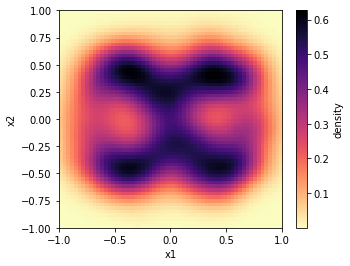

In [ ]:
# Prepare data
z_train = np.random.normal(0,1,2000)
x_train = synthesize_crosscurve(sample_nums=2000, z_list=z_train)

z_val = np.random.normal(0,1,1000)
x_val = synthesize_crosscurve(sample_nums=1000, z_list=z_val)

# Visualize training data pdf
visualize_pdf(x_train, lim=1, c_map= 'magma_r')

**Experiment Code:**

Train VAE with ELBO objective

In [ ]:
# Train with ELBO
# Most arguments of the following functions have reasonable default settings, i list them all here for a pedagogical reason
elbo_vae_instance = train_ELBO_VAE_batched(x_train, 
                                                 x_var=0.02,
                                                 z_dim=1,
                                                 width=50,
                                                 hidden_layers=3,
                                                 learning_rate=0.001,
                                                 S=10,
                                                 n_epochs= 5000,
                                                 report_iter=10,
                                                 batch_size=1000,
                                                 device=device)
# Or use random_start_ELBO_VAE() for several individual runs

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:11<00:00, 69.47it/s]


Train VAE with TVO objective

In [ ]:
# Train with TVO
tvo_vae_instance = train_TVO_VAE_batched(x_train,
                                                x_var=0.02,
                                                z_dim=1,
                                                width=50,
                                                hidden_layers=3,
                                                learning_rate=0.001,
                                                partition=torch.tensor([0.0,0.25,0.50,0.75,1.0]),
                                                S=10,
                                                n_epochs=5000,
                                                report_iter=10,
                                                batch_size=1000,
                                                device=device)
# Or use random_start_TVO_VAE() for several individual runs

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:26<00:00, 57.89it/s]


Train VAE with ELBO objective + LIN trick

In [ ]:
# Train with ELBO + LIN
elbo_lin_vae_instance = train_ELBO_LIN_VAE_batched(x_train,
                                                 x_val,
                                                 x_var=0.02,
                                                 z_dim=1,
                                                 width=50,
                                                 hidden_layers=1,
                                                 learning_rate=0.01,
                                                 S=10,
                                                 n_epochs=5000,
                                                 report_iter=50,
                                                 batch_size=1000,
                                                 device=device)

  1%|▍                                                                               | 29/5000 [00:06<35:13,  2.35it/s]

At iteration 14 aggresive_flag is set to False


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:54<00:00, 92.36it/s]


Train VAE with TVO objective + LIN trick

In [ ]:
# Train with TVO + LIN
tvo_lin_vae_instance = train_TVO_LIN_VAE_batched(x_train,
                                                x_val,
                                                x_var=0.02,
                                                z_dim=1,
                                                width=50,
                                                hidden_layers=1,
                                                learning_rate=0.01,
                                                partition=torch.tensor([0.0,0.25,0.50,0.75,1.0]),
                                                S=10,
                                                n_epochs=5000,
                                                report_iter=50,
                                                batch_size=1000,
                                                device=device)

  0%|▎                                                                               | 16/5000 [00:06<57:55,  1.43it/s]

At iteration 12 aggresive_flag is set to False


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:02<00:00, 79.90it/s]


**Experiment results**:

Objective (ELBO, TVO), log likelihood and KL divergence trace during training 

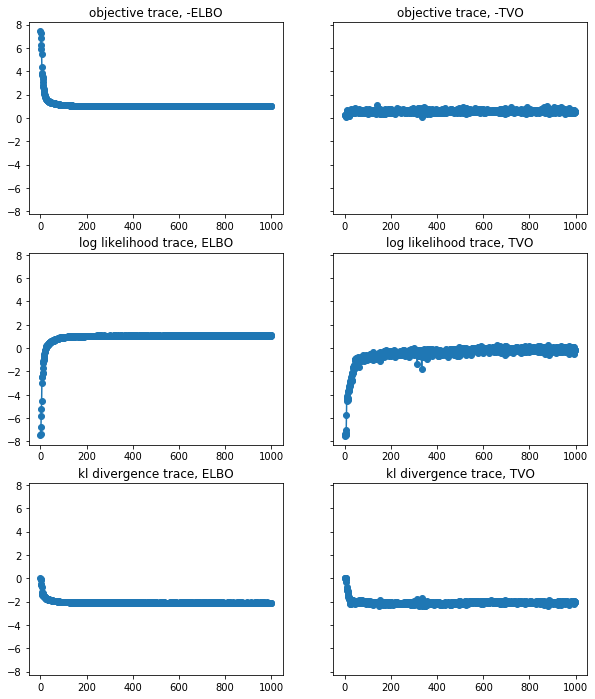

In [ ]:
# Plot out the loss function, log likelihood, kl divergence trace
elbo_vae_instance_llkl = np.array(elbo_vae_instance.llkhd_KL_trace).reshape(-1,2)
tvo_vae_instance_llkl = np.array(tvo_vae_instance.llkhd_KL_trace).reshape(-1,2)
fig, ax=plt.subplots(3,2, figsize=(10,12), sharey=True)
ax[0][0].plot(elbo_vae_instance.objective_trace, 'o-')
ax[0][0].set_title('objective trace, -ELBO')
ax[0][1].plot(tvo_vae_instance.objective_trace, 'o-')
ax[0][1].set_title('objective trace, -TVO')
ax[1][0].plot(elbo_vae_instance_llkl[:,0], 'o-')
ax[1][0].set_title('log likelihood trace, ELBO')
ax[1][1].plot(tvo_vae_instance_llkl[:,0], 'o-')
ax[1][1].set_title('log likelihood trace, TVO')
ax[2][0].plot(-elbo_vae_instance_llkl[:,1], 'o-')
ax[2][0].set_title('kl divergence trace, ELBO')
ax[2][1].plot(-tvo_vae_instance_llkl[:,1], 'o-')
ax[2][1].set_title('kl divergence trace, TVO')
plt.show()

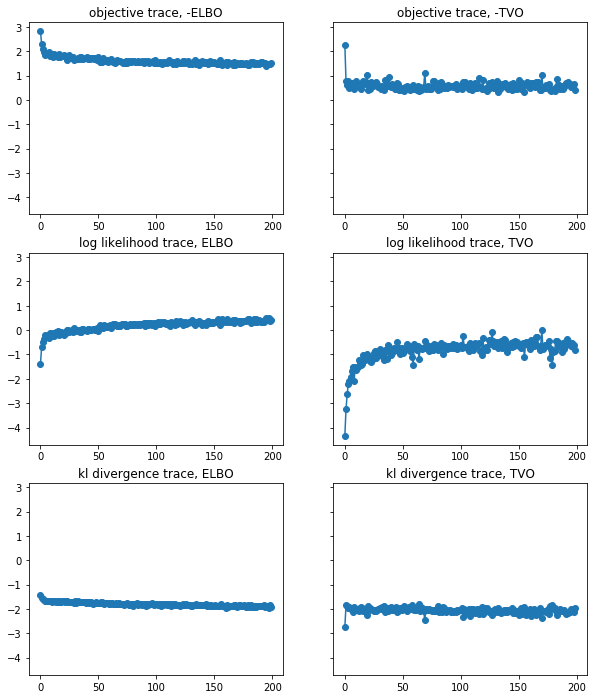

In [ ]:
# Plot out the loss function, log likelihood, kl divergence trace (LIN trick)
elbo_lin_vae_instance_llkl = np.array(elbo_lin_vae_instance.llkhd_KL_trace).reshape(-1,2)
tvo_lin_vae_instance_llkl = np.array(tvo_lin_vae_instance.llkhd_KL_trace).reshape(-1,2)
fig, ax=plt.subplots(3,2, figsize=(10,12), sharey=True)
ax[0][0].plot(elbo_lin_vae_instance.objective_trace, 'o-')
ax[0][0].set_title('objective trace, -ELBO')
ax[0][1].plot(tvo_lin_vae_instance.objective_trace, 'o-')
ax[0][1].set_title('objective trace, -TVO')
ax[1][0].plot(elbo_lin_vae_instance_llkl[:,0], 'o-')
ax[1][0].set_title('log likelihood trace, ELBO')
ax[1][1].plot(tvo_lin_vae_instance_llkl[:,0], 'o-')
ax[1][1].set_title('log likelihood trace, TVO')
ax[2][0].plot(-elbo_lin_vae_instance_llkl[:,1], 'o-')
ax[2][0].set_title('kl divergence trace, ELBO')
ax[2][1].plot(-tvo_lin_vae_instance_llkl[:,1], 'o-')
ax[2][1].set_title('kl divergence trace, TVO')
plt.show()

Compare true vs. decoder PDF 

It is apparent that ELBO is not good approximation of the ground truth generative function. From the first row, we can see that ELBO doesn't learn the cross curve around x=(0,0), but simplified it into wavy upper and lower parts. The same problem is even more pronounced in the case of using LIN trick (the second row). ELBO with LIN trick basically give up in learning the middle multimodal pattern. Compared to ELBO, we think that TVO has been able to learn better than ELBO in both cases (it learns a better middle crossing structure in both rows), though its performance is far from satisfactory.

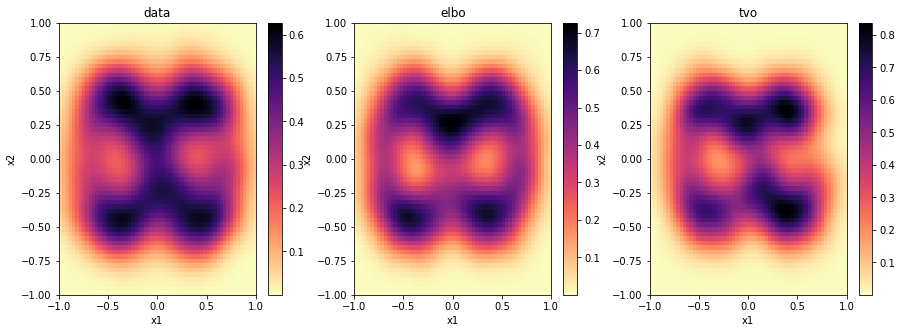

In [ ]:
# Visualize PDF by a helper function
compare_VAE(elbo_vae_instance, tvo_vae_instance, x_train,
                 number_samples=10000, x_var=0.02,
                 lim=1,
                 c_map='magma_r')

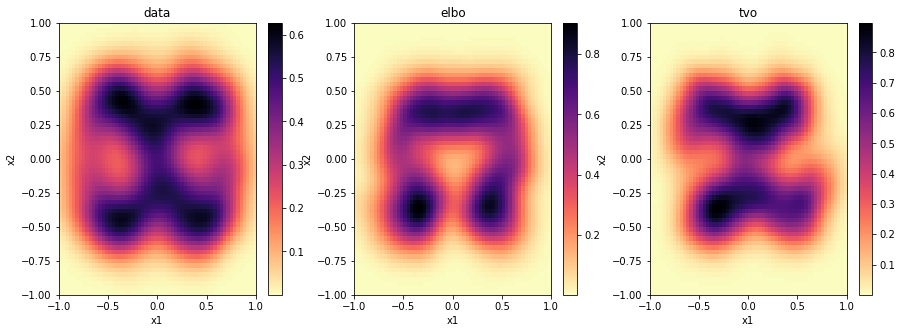

In [ ]:
# Visualize PDF by a helper function (LIN trick)
compare_VAE(elbo_lin_vae_instance, tvo_lin_vae_instance, x_train,
                 number_samples=10000, x_var=0.02,
                 lim=1,
                 c_map='magma_r')

Compare true vs. learned $p_\theta(x)$, and learned vs. true $f_\theta(z)$, colored by the value of z.

A closer look at the learned $f_\theta(z)$ helps us understand the pathologies better. As the failure mode paper has previously found, ELBO has a regularizing effect on the learned $f_\theta$, resulting in x generated from z<-3 and z>3 are sufficiently from x generated from z in the small neighbour of 0. (The curly lower part in ELBO, first row; the out stretched lower part in ELBO, second row). This problem similarly appears in TVO. 

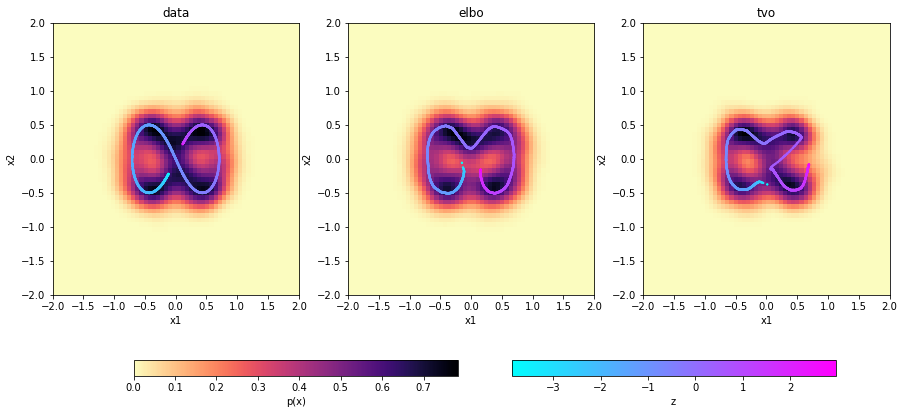

In [ ]:
#Compare true vs. learned p_theta(x), and learned vs. true f_theta(z), colored by the value of z.
compare_VAE_line(elbo_vae_instance, tvo_vae_instance, 1, 2000, torch.normal(0, 1, size=(2000,1)),
                z_train, x_train, 0.02, 2, "magma_r", "cool","crosscurve")



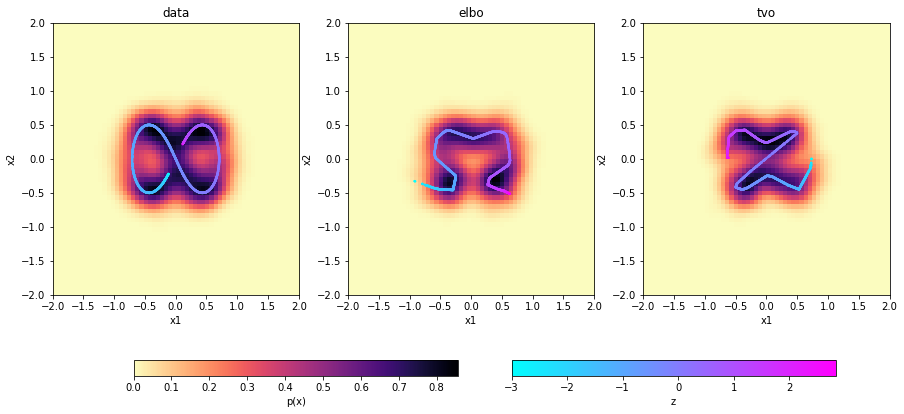

In [ ]:
#Compare true vs. learned p_theta(x), and learned vs. true f_theta(z), colored by the value of z. (LIN)
compare_VAE_line(elbo_lin_vae_instance, tvo_lin_vae_instance, 1, 2000, torch.normal(0, 1, size=(2000,1)),
                z_train, x_train, 0.02, 2, "magma_r", "cool","crosscurve")


True vs. learned $f_\theta(z)$

The below two plots are basically a 3-D version of the previous two rows. We can more clearly see that $f_\theta(z)$ is distorted when z are at its extremes. The regularization is stronger when LIN trick is applied, resulting in a simplier $f_\theta(z)$ (second 3-D plot). Interestingly, we also found that TVO without LIN trick learned a relatively complicated posterior (the diagonal line around z=0).

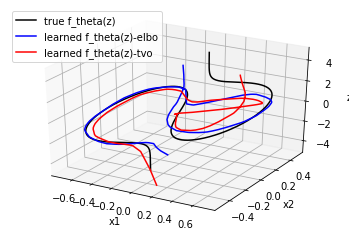

In [ ]:
# true vs. learned f_theta(z)
compare_VAE_true_function(elbo_vae_instance, tvo_vae_instance, z_dim=1, 
                 number_samples=10000, z_samples = torch.linspace(-5, 5, 10000), z_samples_np = np.linspace(-5, 5, 10000),
                               task="crosscurve")

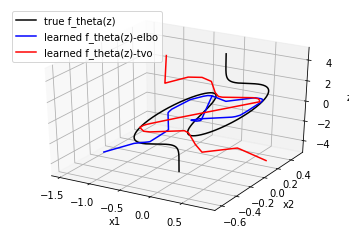

In [ ]:
# true vs. learned f_theta(z) + LIN
compare_VAE_true_function(elbo_lin_vae_instance, tvo_lin_vae_instance, z_dim=1, 
                 number_samples=10000, z_samples = torch.linspace(-5, 5, 10000), z_samples_np = np.linspace(-5, 5, 10000),
                               task="crosscurve")

Aggregated posterior $q_\phi(z)$ vs. prior $p(z)$

ELBO and TVO have similar aggregated posteriors.

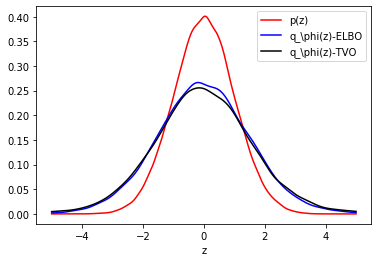

In [ ]:
# prior vs. aggregated posterior
aggregated_posterior(elbo_vae_instance, tvo_vae_instance, x_train, 10, device=device)

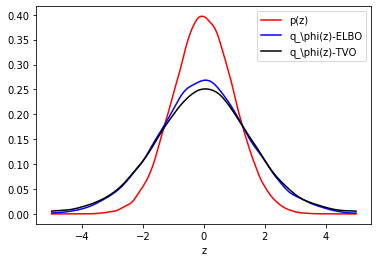

In [ ]:
# prior vs. aggregated posterior (LIN)
aggregated_posterior(elbo_lin_vae_instance, tvo_lin_vae_instance, x_train, 10, device=device)

True posterior vs. trained posterior

Compared to the true posteiror, it is clear that both ELBO and TVO learns simpler posteriors, regardless of the usage of LIN. However, note that TVO is more tolerant of multimodal posterior compared to ELBO, which is most evident in the case of p(z|x=(0.2, 0.2)) (third column)

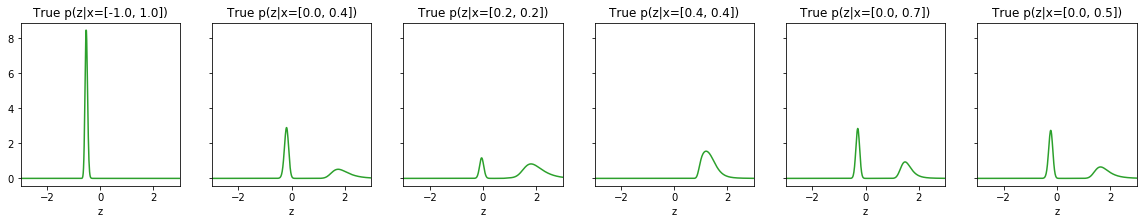

In [ ]:
x_value_list = [[-1.0,1.0], [0.0, 0.4], [0.2, 0.2], [0.4, 0.4], [0.0, 0.7], [0.0, 0.5]]

def f_true_corssover(z):
    '''
    Output x_mean, given a z, based on True f
    '''
    u = lambda z: np.pi*(0.6+1.8*norm.cdf(z))
    f1 = lambda u: (1./np.sqrt(2))*(np.cos(u)/((np.sin(u))**2 + 1.))
    f2 = lambda u: (np.sqrt(2)) * (np.cos(u) * np.sin(u))/((np.sin(u))**2 + 1.)

    u_value= u(z)
    f1_value = f1(u_value) 
    f2_value = f2(u_value)
    return [f1_value, f2_value]

column_num = len(x_value_list)

# true posteior
fig, ax = plt.subplots(1,column_num, figsize=[20,3], sharey=True)
for i,x_value in enumerate(x_value_list):
    posterior_i = true_posterior(x_value, 0.02, f_true_corssover, np.linspace(-3,3,500))
    ax[i].plot(np.linspace(-3,3,500), posterior_i, lw=1.5, color='tab:green')
    ax[i].set_title('True p(z|x={})'.format(x_value))
    ax[i].set_xlabel('z')
    ax[i].set_xlim([-3,3])
plt.show()

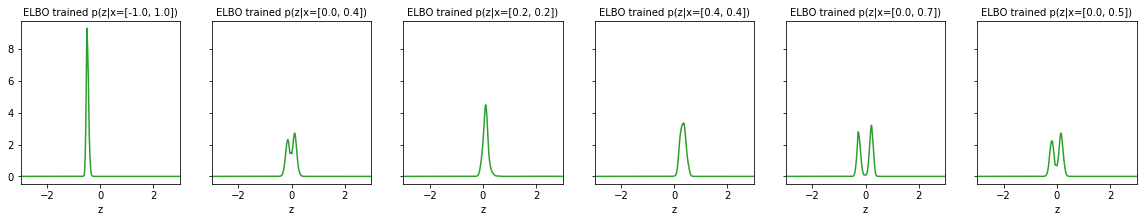

In [ ]:
# ELBO without LIN Trick
column_num = len(x_value_list)
fig, ax = plt.subplots(1,column_num, figsize=[20,3], sharey=True)
for i,x_value in enumerate(x_value_list):
    posterior_i = trained_posterior(x_value, 0.02, elbo_vae_instance, z_list=np.linspace(-3,3,500))
    ax[i].plot(np.linspace(-3,3,500), posterior_i, lw=1.5, color='tab:green')
    ax[i].set_title('ELBO trained p(z|x={})'.format(x_value), fontsize=10)
    ax[i].set_xlabel('z')
    ax[i].set_xlim([-3,3])
plt.show()

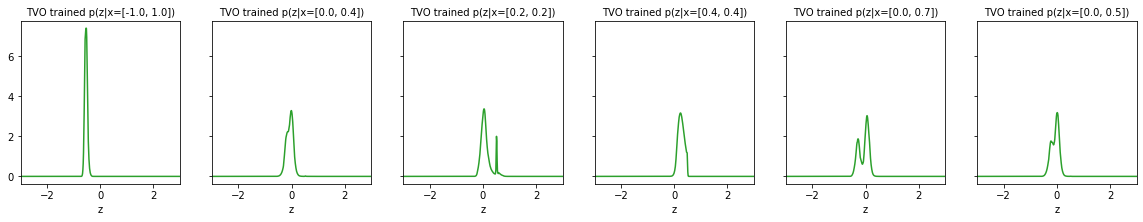

In [ ]:
# TVO without LIN Trick
column_num = len(x_value_list)
fig, ax = plt.subplots(1,column_num, figsize=[20,3], sharey=True)
for i,x_value in enumerate(x_value_list):
    posterior_i = trained_posterior(x_value, 0.02, tvo_vae_instance, z_list=np.linspace(-3,3,500))
    ax[i].plot(np.linspace(-3,3,500), posterior_i, lw=1.5, color='tab:green')
    ax[i].set_title('TVO trained p(z|x={})'.format(x_value), fontsize=10)
    ax[i].set_xlabel('z')
    ax[i].set_xlim([-3,3])
plt.show()

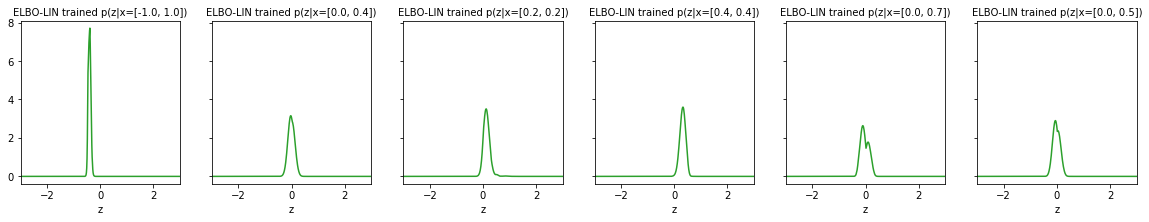

In [ ]:
# ELBO with LIN Trick
column_num = len(x_value_list)
fig, ax = plt.subplots(1,column_num, figsize=[20,3], sharey=True)
for i,x_value in enumerate(x_value_list):
    posterior_i = trained_posterior(x_value, 0.02, elbo_lin_vae_instance, z_list=np.linspace(-3,3,500))
    ax[i].plot(np.linspace(-3,3,500), posterior_i, lw=1.5, color='tab:green')
    ax[i].set_title('ELBO-LIN trained p(z|x={})'.format(x_value), fontsize=10)
    ax[i].set_xlabel('z')
    ax[i].set_xlim([-3,3])
plt.show()

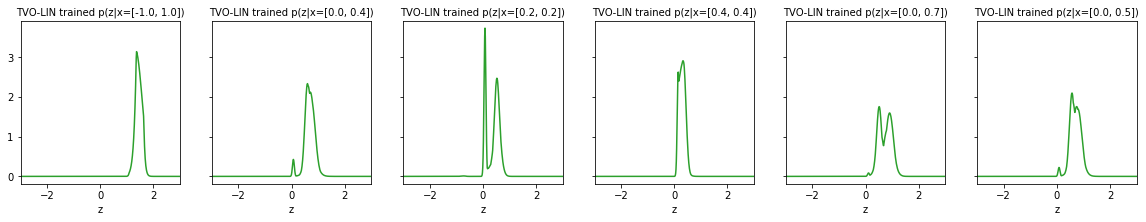

In [ ]:
# TVO with LIN Trick
column_num = len(x_value_list)
fig, ax = plt.subplots(1,column_num, figsize=[20,3], sharey=True)
for i,x_value in enumerate(x_value_list):
    posterior_i = trained_posterior(x_value, 0.02, tvo_lin_vae_instance, z_list=np.linspace(-3,3,500))
    ax[i].plot(np.linspace(-3,3,500), posterior_i, lw=1.5, color='tab:green')
    ax[i].set_title('TVO-LIN trained p(z|x={})'.format(x_value), fontsize=10)
    ax[i].set_xlabel('z')
    ax[i].set_xlim([-3,3])
plt.show()

### Pedagogical experiment2: Cluster Example

**Generative Process:**

$$
\begin{aligned}z & \sim \mathcal{N}(0,1) \\\epsilon & \sim \mathcal{N}\left(0, \sigma_{\epsilon}^{2} \cdot I\right) \\u(z) &=\frac{2 \pi}{1+e^{-\frac{1}{2} \pi z}} \\ t(u)&=2 \cdot \tanh (10 \cdot u-20 \cdot\lfloor u / 2\rfloor-10)+4 \cdot\lfloor u / 2\rfloor+2 \\ x \mid z&=\underbrace{\left[\begin{array}{c}
\cos (t(u(z))) \\
\sin (t(u(z)))
\end{array}\right]}_{f_{\theta_{\mathrm{GT}}}(z)}+\epsilon, {\sigma}_{\epsilon}^{2}=0.2\end{aligned}
$$

Similar to the previous experiment, the current example demonstrate a multimodal posterior due to several interleaving of high density and low density regions on the manifolds. Besides, there doesnt seem to exist a likelihood function that have a simple posterior and could learn the mapping relationship well. Therefore, this example also satisfies two conditions.


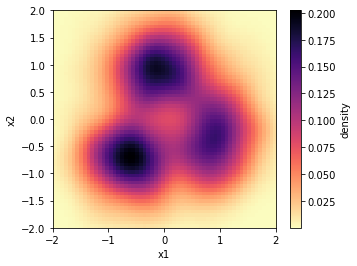

In [ ]:
# Prepare data
z_train2 = np.random.normal(0,1,2000)
x_train2 = synthesize_threeclusters(sample_nums=2000)

z_val2 = np.random.normal(0,1,1000)
x_val2 = synthesize_crosscurve(sample_nums=1000, z_list=z_val2)

# Visualize training data pdf
visualize_pdf(x_train2, lim=2, c_map= 'magma_r')

**Experiment Code:**

Train VAE with ELBO objective

In [ ]:
# Train with ELBO
# Most arguments of the following functions have reasonable default settings, i list them all here for a pedagogical reason
elbo_vae_instance2 = train_ELBO_VAE_batched(x_train2, 
                                                 x_var=0.2,
                                                 z_dim=1,
                                                 width=50,
                                                 hidden_layers=3,
                                                 learning_rate=0.001,
                                                 S=10,
                                                 n_epochs=5000,
                                                 report_iter=10,
                                                 batch_size=1000,
                                                 device=device)
# Or use utils.random_start_ELBO_VAE() for several individual runs

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:16<00:00, 65.66it/s]


Train VAE with TVO objective

In [ ]:
# Train with TVO
tvo_vae_instance2 = train_TVO_VAE_batched(x_train2,
                                                x_var=0.2,
                                                z_dim=1,
                                                width=50,
                                                hidden_layers=3,
                                                learning_rate=0.001,
                                                partition=torch.tensor([0.0,0.25,0.50,0.75,1.0]),
                                                S=10,
                                                n_epochs=5000,
                                                report_iter=10,
                                                batch_size=1000,
                                                device=device)
# Or use utils.random_start_TVO_VAE() for several individual runs

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:20<00:00, 62.41it/s]


Train VAE with ELBO objective + LIN trick

In [ ]:
# Train with ELBO + LIN
elbo_lin_vae_instance2 = train_ELBO_LIN_VAE_batched(x_train2,
                                                 x_val2,
                                                 x_var=0.2,
                                                 z_dim=1,
                                                 width=50,
                                                 hidden_layers=1,
                                                 learning_rate=0.01,
                                                 S=10,
                                                 n_epochs=5000,
                                                 report_iter=50,
                                                 batch_size=1000,
                                                 device=device)

  0%|▎                                                                               | 18/5000 [00:05<49:14,  1.69it/s]

At iteration 12 aggresive_flag is set to False


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:52<00:00, 94.49it/s]


Train VAE with TVO objective + LIN trick

In [ ]:
# Train with TVO + LIN
tvo_lin_vae_instance2 = train_TVO_LIN_VAE_batched(x_train2,
                                                x_val2,
                                                x_var=0.2,
                                                z_dim=1,
                                                width=50,
                                                hidden_layers=1,
                                                learning_rate=0.01,
                                                partition=torch.tensor([0.0,0.25,0.50,0.75,1.0]),
                                                S=10,
                                                n_epochs=5000,
                                                report_iter=50,
                                                batch_size=1000,
                                                device=device)

  0%|▍                                                                               | 25/5000 [00:06<41:20,  2.01it/s]

At iteration 12 aggresive_flag is set to False


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:07<00:00, 74.58it/s]


**Experiment Results:**

Objective (ELBO, TVO), log likelihood and KL divergence trace during training 

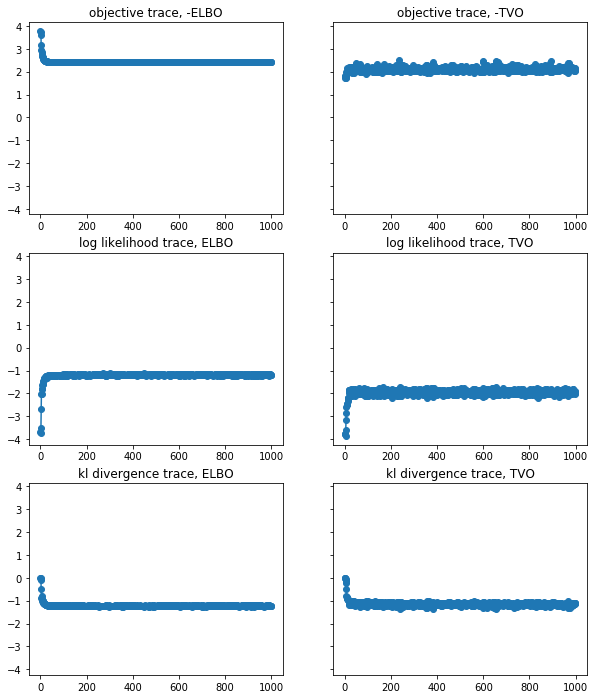

In [ ]:
# Plot out the loss function, log likelihood, kl divergence trace
elbo_vae_instance_llkl2 = np.array(elbo_vae_instance2.llkhd_KL_trace).reshape(-1,2)
tvo_vae_instance_llkl2 = np.array(tvo_vae_instance2.llkhd_KL_trace).reshape(-1,2)
fig, ax=plt.subplots(3,2, figsize=(10,12), sharey=True)
ax[0][0].plot(elbo_vae_instance2.objective_trace, 'o-')
ax[0][0].set_title('objective trace, -ELBO')
ax[0][1].plot(tvo_vae_instance2.objective_trace, 'o-')
ax[0][1].set_title('objective trace, -TVO')
ax[1][0].plot(elbo_vae_instance_llkl2[:,0], 'o-')
ax[1][0].set_title('log likelihood trace, ELBO')
ax[1][1].plot(tvo_vae_instance_llkl2[:,0], 'o-')
ax[1][1].set_title('log likelihood trace, TVO')
ax[2][0].plot(-elbo_vae_instance_llkl2[:,1], 'o-')
ax[2][0].set_title('kl divergence trace, ELBO')
ax[2][1].plot(-tvo_vae_instance_llkl2[:,1], 'o-')
ax[2][1].set_title('kl divergence trace, TVO')
plt.show()

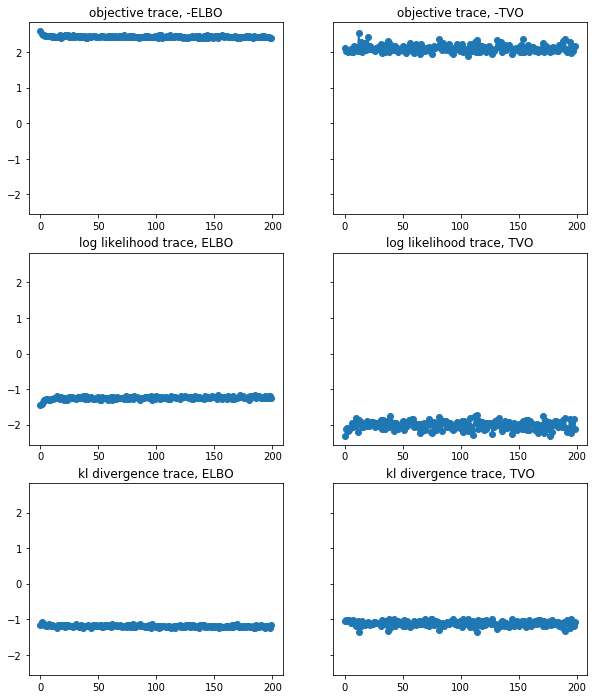

In [ ]:
# Plot out the loss function, log likelihood, kl divergence trace
elbo_lin_vae_instance_llkl2 = np.array(elbo_lin_vae_instance2.llkhd_KL_trace).reshape(-1,2)
tvo_lin_vae_instance_llkl2 = np.array(tvo_lin_vae_instance2.llkhd_KL_trace).reshape(-1,2)
fig, ax=plt.subplots(3,2, figsize=(10,12), sharey=True)
ax[0][0].plot(elbo_lin_vae_instance2.objective_trace, 'o-')
ax[0][0].set_title('objective trace, -ELBO')
ax[0][1].plot(tvo_lin_vae_instance2.objective_trace, 'o-')
ax[0][1].set_title('objective trace, -TVO')
ax[1][0].plot(elbo_lin_vae_instance_llkl2[:,0], 'o-')
ax[1][0].set_title('log likelihood trace, ELBO')
ax[1][1].plot(tvo_lin_vae_instance_llkl2[:,0], 'o-')
ax[1][1].set_title('log likelihood trace, TVO')
ax[2][0].plot(-elbo_lin_vae_instance_llkl2[:,1], 'o-')
ax[2][0].set_title('kl divergence trace, ELBO')
ax[2][1].plot(-tvo_lin_vae_instance_llkl2[:,1], 'o-')
ax[2][1].set_title('kl divergence trace, TVO')
plt.show()

Compare true vs. decoder PDF 

Our results suggest that when it comes to the cluster example, it seems equally difficult for ELBO and TVO to learn the interleaving high- and low- density areas. They all failure to learn the closed shape and distorted the x's generated from very small and very large z to be different from each other. Note that with LIN trick, TVO seems to learn slightly better than ELBO (second row), have less density between three clusters. 

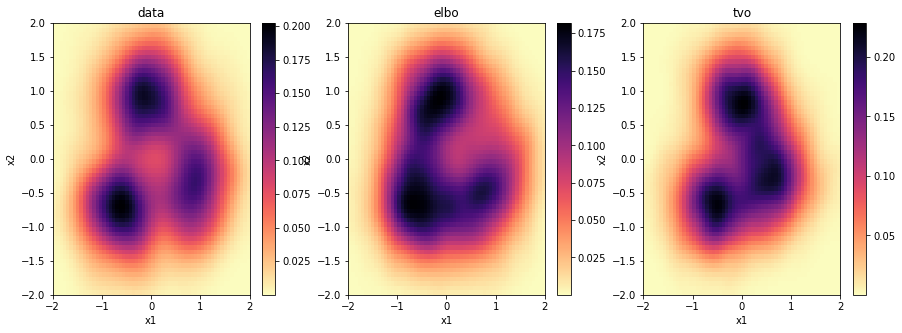

In [ ]:
# Visualize PDF by a helper function
compare_VAE(elbo_vae_instance2, tvo_vae_instance2, x_train2,
                 number_samples=10000, x_var=0.2,
                 lim=2,
                 c_map='magma_r')

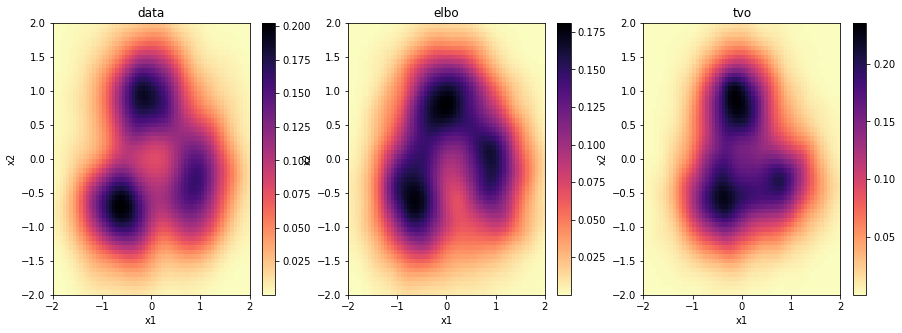

In [ ]:
# Visualize PDF by a helper function
compare_VAE(elbo_lin_vae_instance2, tvo_lin_vae_instance2, x_train2,
                 number_samples=10000, x_var=0.2,
                 lim=2,
                 c_map='magma_r')

Compare true vs. learned $p_\theta(x)$, and learned vs. true $f_\theta(z)$, colored by the value of z.

Results look similar to the first experiment. See discussion above.

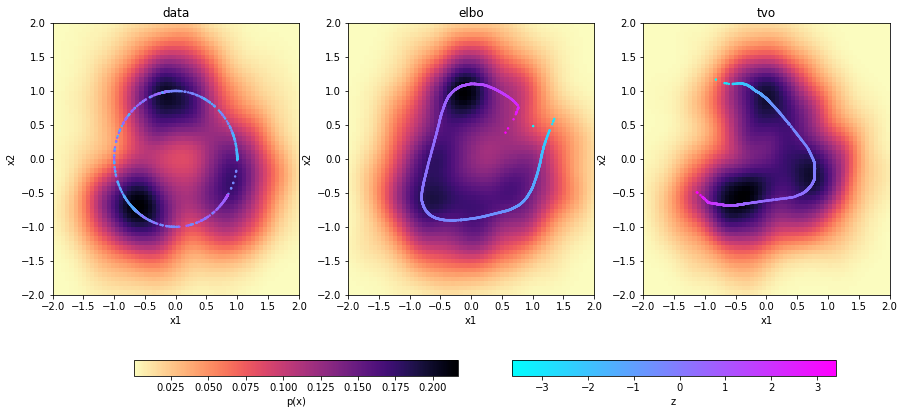

In [ ]:
compare_VAE_line(elbo_vae_instance2, tvo_vae_instance2, 1, 2000, torch.normal(0, 1, size=(2000,1)),
                z_train2, x_train2, 0.2, 2, "magma_r", "cool","threeclusters")


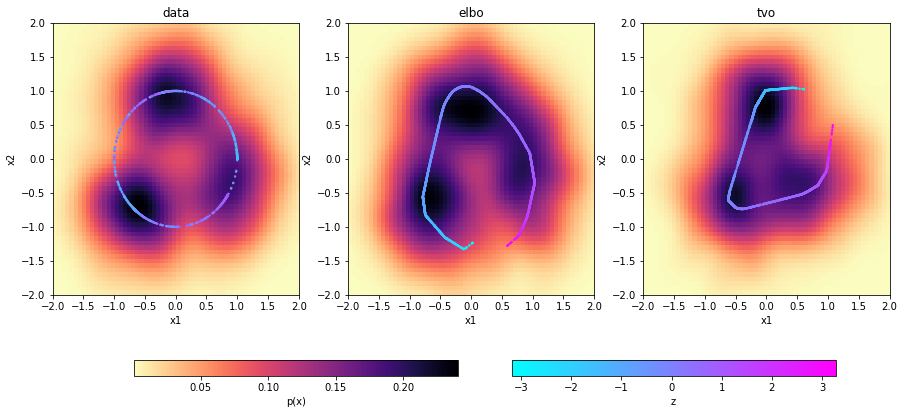

In [ ]:
compare_VAE_line(elbo_lin_vae_instance2, tvo_lin_vae_instance2, 1, 2000, torch.normal(0, 1, size=(2000,1)),
                z_train2, x_train2, 0.2, 2, "magma_r", "cool","threeclusters")


True vs. learned $f_\theta(z)$

The learned $f_\theta(z)$ is much simpler than the ground truth one for all our VAEs. As we have discussed above, this mainly reflects the fact that ELBO and TVO are not able to learn the interleaving steep and flat areas, and end up learning generative functions that are in general more flat. 

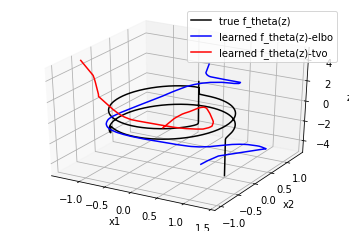

In [ ]:
compare_VAE_true_function(elbo_vae_instance2, tvo_vae_instance2, z_dim=1, 
                 number_samples=10000, z_samples = torch.linspace(-5, 5, 10000), z_samples_np = np.linspace(-5, 5, 10000),
                               task='threeclusters')

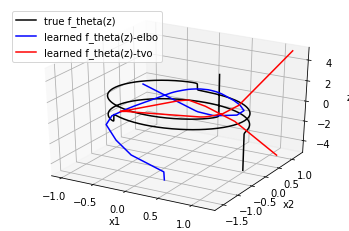

In [ ]:
compare_VAE_true_function(elbo_lin_vae_instance2, tvo_lin_vae_instance2, z_dim=1, 
                 number_samples=10000, z_samples = torch.linspace(-5, 5, 10000), z_samples_np = np.linspace(-5, 5, 10000),
                               task='threeclusters')

Aggregated posterior $q_\phi(z)$ vs. prior $p(z)$

ELBO and TVO have similar aggregated posterior.

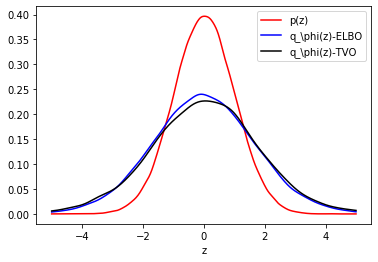

In [ ]:
aggregated_posterior(elbo_vae_instance2, tvo_vae_instance2, x_train2, 10, device=device)

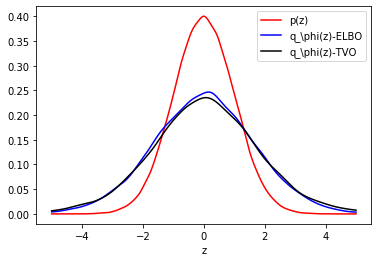

In [ ]:
aggregated_posterior(elbo_lin_vae_instance2, tvo_lin_vae_instance2, x_train2, 10, device=device)

True Posterior vs. trained posterior

Both ELBO and TVO have simplier trained posteriors compared to the true posterior which is multimodal at several locations of x.

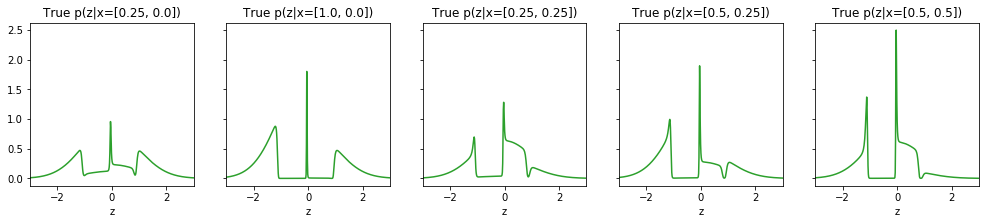

In [ ]:
x_value_list2 = [[0.25,0.0], [1.0, 0.0], [0.25, 0.25], [0.50, 0.25], [0.50, 0.50]]

def f_true_threeclusters(z):
    '''
    Output x_mean, given a z, based on True f
    '''
    u = lambda z: (2*np.pi)/(1.+np.exp(-0.5*np.pi*z))
    t = lambda u: 2*np.tanh(10*u - 20*np.floor(u/2.) -10.) + 4.*np.floor(u/2.) + 2
    f1 = lambda t: np.cos(t)
    f2 = lambda t: np.sin(t)

    u_value = u(z)
    t_value = t(u_value)
    f1_value = f1(t_value)
    f2_value = f2(t_value)
    return [f1_value, f2_value]

column_num2 = len(x_value_list2)

# true posteior
fig, ax = plt.subplots(1,column_num2, figsize=[17,3], sharey=True)
for i,x_value in enumerate(x_value_list2):
    posterior_i = true_posterior(x_value, 0.2, f_true_threeclusters,np.linspace(-3,3,500))
    ax[i].plot(np.linspace(-3,3,500), posterior_i, lw=1.5, color='tab:green')
    ax[i].set_title('True p(z|x={})'.format(x_value))
    ax[i].set_xlabel('z')
    ax[i].set_xlim([-3,3])
plt.show()

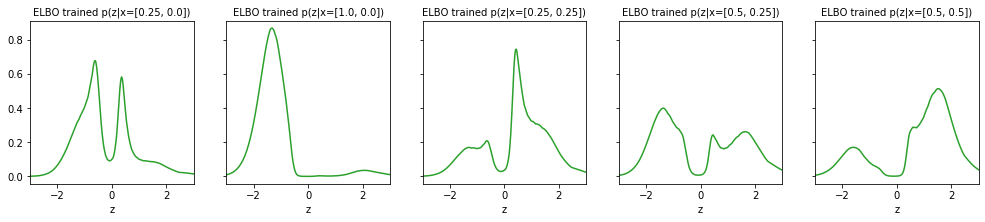

In [ ]:
# ELBO without LIN Trick
column_num2 = len(x_value_list2)
fig, ax = plt.subplots(1,column_num2, figsize=[17,3], sharey=True)
for i,x_value in enumerate(x_value_list2):
    posterior_i = trained_posterior(x_value, 0.2, elbo_vae_instance2, z_list=np.linspace(-3,3,500))
    ax[i].plot(np.linspace(-3,3,500), posterior_i, lw=1.5, color='tab:green')
    ax[i].set_title('ELBO trained p(z|x={})'.format(x_value), fontsize=10)
    ax[i].set_xlabel('z')
    ax[i].set_xlim([-3,3])
plt.show()

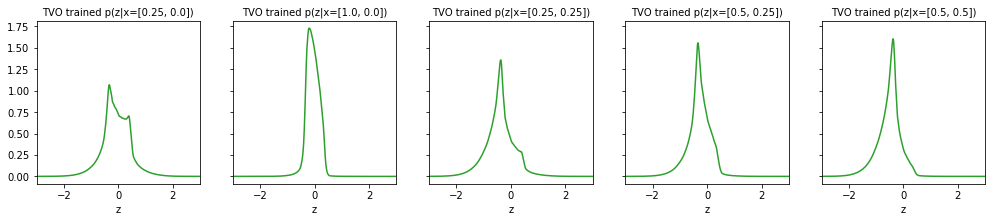

In [ ]:
# TVO without LIN Trick
column_num2 = len(x_value_list2)
fig, ax = plt.subplots(1,column_num2, figsize=[17,3], sharey=True)
for i,x_value in enumerate(x_value_list2):
    posterior_i = trained_posterior(x_value, 0.2, tvo_vae_instance2, z_list=np.linspace(-3,3,500))
    ax[i].plot(np.linspace(-3,3,500), posterior_i, lw=1.5, color='tab:green')
    ax[i].set_title('TVO trained p(z|x={})'.format(x_value), fontsize=10)
    ax[i].set_xlabel('z')
    ax[i].set_xlim([-3,3])
plt.show()

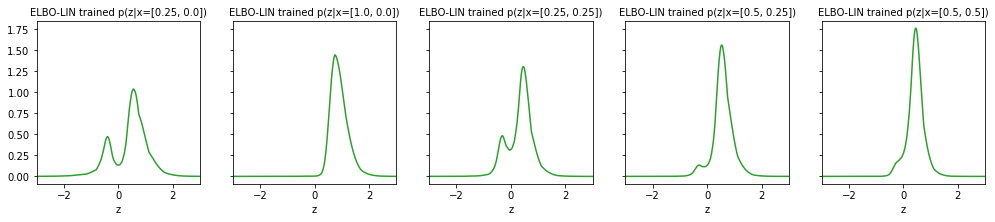

In [ ]:
# ELBO with LIN Trick
column_num2 = len(x_value_list2)
fig, ax = plt.subplots(1,column_num2, figsize=[17,3], sharey=True)
for i,x_value in enumerate(x_value_list2):
    posterior_i = trained_posterior(x_value, 0.2, elbo_lin_vae_instance2, z_list=np.linspace(-3,3,500))
    ax[i].plot(np.linspace(-3,3,500), posterior_i, lw=1.5, color='tab:green')
    ax[i].set_title('ELBO-LIN trained p(z|x={})'.format(x_value), fontsize=10)
    ax[i].set_xlabel('z')
    ax[i].set_xlim([-3,3])
plt.show()

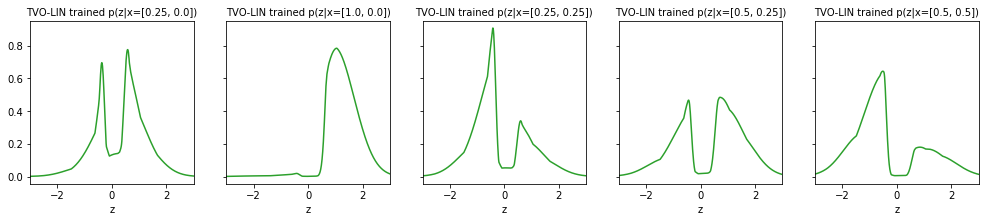

In [ ]:
# TVO with LIN Trick
column_num2 = len(x_value_list2)
fig, ax = plt.subplots(1,column_num2, figsize=[17,3], sharey=True)
for i,x_value in enumerate(x_value_list2):
    posterior_i = trained_posterior(x_value, 0.2, tvo_lin_vae_instance2, z_list=np.linspace(-3,3,500))
    ax[i].plot(np.linspace(-3,3,500), posterior_i, lw=1.5, color='tab:green')
    ax[i].set_title('TVO-LIN trained p(z|x={})'.format(x_value), fontsize=10)
    ax[i].set_xlabel('z')
    ax[i].set_xlim([-3,3])
plt.show()

### General Discussion and Future work 

Our experiments show that TVO performs almost at the same level as ELBO does on the hard tasks. 
TVO might be mariginally better than ELBO, but the performance of TVO is not consistently
better than ELBO across runs. In addition, we find TVO a bit more sensitive to hyper-parameters
when tuning model parameters for training. For many set of hyper-parameters with which ELBO loss
can stably decrease, TVO loss fluctuates or even spikes. This might be caused by the partition and
approximate process in TVO. 

The fact that compared to ELBO there are a couple of more parameters need to be chose for TVO, 
e.g. the number of partitions, the number of particles, might also contribute to the sensitivity of TVO training to parameters. 
In the experiments displayed in the paper, the authors have pointed out that there 
seems to exist an optimal number of partitions due to a trade-off between better approximation and 
the added noise due to importance sampling, and they empirically find that the number of partitions = 2 is a sweetspot. 
However, it is unclear to the readers whether this is something that will change across tasks or is universal. 
Similarly, there seems to exist an optimal number of particles (e.g., in the first discrete experiment, 
TVO converges fastest when number of particle < 50). Since TVO hasn't been widely applied, there lacks 
a clear guidance on how to choose the combination of the paramters abovementioned.

Another point worth mentioning is that TVO seems to take less time to run compared to ELBO when running on cpu. (~3x speed). 
Though it is not clear to us what is the reason, this matches the experiment finding in the original paper, 
namely when number of partition < 50, TVO converges more quickly than ELBO. This feature makes TVO attractive 
for small-scale tasks and is more computational efficient compared to traiditional ELBO.

The motivation of TVO is that we want a better approximation/a tighter bound of log evidence compared to ELBO. 
The primary problem caused by the gap between ELBO and log evidence is that when ELBO reaches maximum, 
log evidnece doesn't necesarily reach its global maximum, which makes a tighter bound desirable. 
However, other problems of ELBO is brought by the built in tension between the generative and inference networks, 
which can't be easily solved when the bound is tighter. Indeed, from our experiment TVO performs at the same level
as ELBO most of the time. This makes us to question the implicit assumption that "tight is better": 
a tighter bounder does not always guarantee a better optimization performance. As the loss landscape might be more rugged 
with a tighter bound function, the optimizer could have a higher probability to be trapped in a local basin. 
In fact, it has even been argued that [a tigher bound could not be necessarily better](https://arxiv.org/pdf/1802.04537.pdf) 
and could be detrimental to the process of learning the inference network by reducing the signal-to-noise ratio of gradient estimator 
and arbitrarily deteriorate the inference network. Hence, one possible direction for future work is 
visuazling the loss landscape of TVO with the parition interval fixed, and determine whether a tighter bound
like TVO can provide an easier loss landscape for optimization.



### Broader Impact 

First, a key takeaway for practitioners is that they should not immediately adopt new techniques with only 
a rough idea why the new techniques are better. For example, while the thermodynamic paper mostly focus on the 
technical detail of getting a tighter bound compared to ELBO, it did not spend too much space discussing the influence of TVO on downstream tasks. 
However, as we have mentioned in the 'general discussion and future work' part, TVO suffers from 
similar pathologies as ELBO does(i.e., trade off betwteen learning the generative and inference network), and
might perform even worse if the parameters are not set properly. 

The second takeaway, mostly for the general VAE community, is that "tighter" is not always better. 
As we design our VAE objective, we need to take many other factors into account. As our experiments have shown,
TVO's theoretical property of being a tighter bound than ELBO does not necesarily guarantee that its performance
can beat ELBO. In addition, the mechanism of partition and approximate might have made TVO more sensitive to
training parameters and time consuming to fine tune. Therefore we have to take an all-rounded approach in order to find the best learning objective for our task at hand,
as there is often a discrepency between theory and reality.

## Reference

Masrani, Vaden, Tuan Anh Le, and Frank Wood. "The Thermodynamic Variational Objective." Advances in Neural Information Processing Systems. 2019.

Yacoby, Yaniv, Weiwei Pan, and Finale Doshi-Velez. "Failure Modes of Variational Autoencoders and Their Effects on Downstream Tasks." arXiv preprint arXiv:2007.07124 (2020).

He, Junxian, et al. "Lagging inference networks and posterior collapse in variational autoencoders." arXiv preprint arXiv:1901.05534 (2019).

Ciccotti, Giovanni. "Molecular-dynamics simulation of statistical-mechanical systems: Varenna on Lake Como, Villa Monastero, 23 July-2 August 1985." (1986).

Bornschein, Jorg, et al. "Bidirectional helmholtz machines." International Conference on Machine Learning. 2016.

Roger B Grosse, Chris J Maddison, and Ruslan R Salakhutdinov. Annealing between distributions by averaging moments. In Advances in Neural Information Processing Systems, pages 2769–2777, 2013.

Bornschein, Jörg, and Yoshua Bengio. "Reweighted wake-sleep." arXiv preprint arXiv:1406.2751 (2014).

Burda, Yuri, Roger Grosse, and Ruslan Salakhutdinov. "Importance weighted autoencoders." arXiv preprint arXiv:1509.00519 (2015).

Maddison, Chris J., et al. "Filtering variational objectives." Advances in Neural Information Processing Systems 30 (2017): 6573-6583.

Le, Tuan Anh, et al. "Auto-encoding sequential monte carlo." arXiv preprint arXiv:1705.10306 (2017).

Mnih, Andriy, and Danilo J. Rezende. "Variational inference for monte carlo objectives." arXiv preprint arXiv:1602.06725 (2016).

Rainforth, Tom, et al. "Tighter variational bounds are not necessarily better." arXiv preprint arXiv:1802.04537 (2018).